In [2]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import copy
from pylab import rcParams

In [4]:
%matplotlib inline
rcParams['figure.figsize']=15, 10
warnings.filterwarnings('ignore')

In [5]:
df1=pd.read_csv('/kaggle/input/finaldatasetpreprocessed/Final_Half_Hour (1).csv')
df1

,Unnamed: 0,SourceId,DestinationId,Station_Pair,Year,Month,Weekday,HalfHourSlot,Date_Time,Passenger_Count,Is_Holiday,Holiday_Type
0,0,15,15,Vrindavan Society-Vrindavan Society,2018,7,1,20,2018-07-10 09:30:00,1,0,0
1,1,15,15,Vrindavan Society-Vrindavan Society,2018,7,1,24,2018-07-03 11:30:00,1,0,0
2,2,15,15,Vrindavan Society-Vrindavan Society,2018,7,1,32,2018-07-17 15:30:00,1,0,0
3,3,15,15,Vrindavan Society-Vrindavan Society,2018,7,4,23,2018-07-27 11:00:00,1,0,0
4,4,15,15,Vrindavan Society-Vrindavan Society,2018,8,0,28,2018-08-06 13:30:00,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1265140,1265140,21,20,Wagle Depot-Yashodhannagar,2019,11,0,29,2019-11-11 14:00:00,1,0,0
1265141,1265141,21,20,Wagle Depot-Yashodhannagar,2019,12,0,31,2019-12-16 15:00:00,1,0,0
1265142,1265142,21,20,Wagle Depot-Yashodhannagar,2022,11,3,30,2022-11-10 14:30:00,1,0,0
1265143,1265143,21,20,Wagle Depot-Yashodhannagar,2023,10,2,37,2023-10-04 18:00:00,1,0,0


In [21]:
halfhour_2018 = df1[df1['Year'] == 2018]
halfhour_2019 = df1[df1['Year'] == 2019]
halfhour_2020 = df1[df1['Year'] == 2020]
halfhour_2021 = df1[df1['Year'] == 2021]
halfhour_2022 = df1[df1['Year'] == 2022]
halfhour_2023 = df1[df1['Year'] == 2023]
halfhour_2024 = df1[df1['Year'] == 2024]

In [6]:
half_hour=df1[['Date_Time', 'Passenger_Count']]
half_hour 

,Date_Time,Passenger_Count
0,2018-07-10 09:30:00,1
1,2018-07-03 11:30:00,1
2,2018-07-17 15:30:00,1
3,2018-07-27 11:00:00,1
4,2018-08-06 13:30:00,1
...,...,...
1265140,2019-11-11 14:00:00,1
1265141,2019-12-16 15:00:00,1
1265142,2022-11-10 14:30:00,1
1265143,2023-10-04 18:00:00,1


In [7]:
df2=pd.read_csv('/kaggle/input/finaldatasetpreprocessed/Hour_Final (1).csv')
df2

,Unnamed: 0,SourceId,DestinationId,Station_Pair,Year,Month,Weekday,OneHourSlot,Date_Time,Passenger_Count,Is_Holiday,Holiday_Type
0,0,15,15,Vrindavan Society-Vrindavan Society,2018,7,1,10,2018-07-10 09:00:00,1,0,0
1,1,15,15,Vrindavan Society-Vrindavan Society,2018,7,1,12,2018-07-03 11:00:00,1,0,0
2,2,15,15,Vrindavan Society-Vrindavan Society,2018,7,1,16,2018-07-17 15:00:00,1,0,0
3,3,15,15,Vrindavan Society-Vrindavan Society,2018,7,4,12,2018-07-27 11:00:00,1,0,0
4,4,15,15,Vrindavan Society-Vrindavan Society,2018,8,0,14,2018-08-06 13:00:00,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
784665,784665,21,20,Wagle Depot-Yashodhannagar,2019,11,0,15,2019-11-11 14:00:00,1,0,0
784666,784666,21,20,Wagle Depot-Yashodhannagar,2019,12,0,16,2019-12-16 15:00:00,1,0,0
784667,784667,21,20,Wagle Depot-Yashodhannagar,2022,11,3,15,2022-11-10 14:00:00,1,0,0
784668,784668,21,20,Wagle Depot-Yashodhannagar,2023,10,2,19,2023-10-04 18:00:00,1,0,0


In [22]:
hour_2018 = df2[df2['Year'] == 2018]
hour_2019 = df2[df2['Year'] == 2019]
hour_2020 = df2[df2['Year'] == 2020]
hour_2021 = df2[df2['Year'] == 2021]
hour_2022 = df2[df2['Year'] == 2022]
hour_2023 = df2[df2['Year'] == 2023]
hour_2024 = df2[df2['Year'] == 2024]

In [8]:
hour = df2[['Date_Time', 'Passenger_Count']]
hour

,Date_Time,Passenger_Count
0,2018-07-10 09:00:00,1
1,2018-07-03 11:00:00,1
2,2018-07-17 15:00:00,1
3,2018-07-27 11:00:00,1
4,2018-08-06 13:00:00,1
...,...,...
784665,2019-11-11 14:00:00,1
784666,2019-12-16 15:00:00,1
784667,2022-11-10 14:00:00,1
784668,2023-10-04 18:00:00,1


In [9]:
half_hour.index = pd.to_datetime(half_hour.index)
hour.index=pd.to_datetime(hour.index)

## Passenger count plots

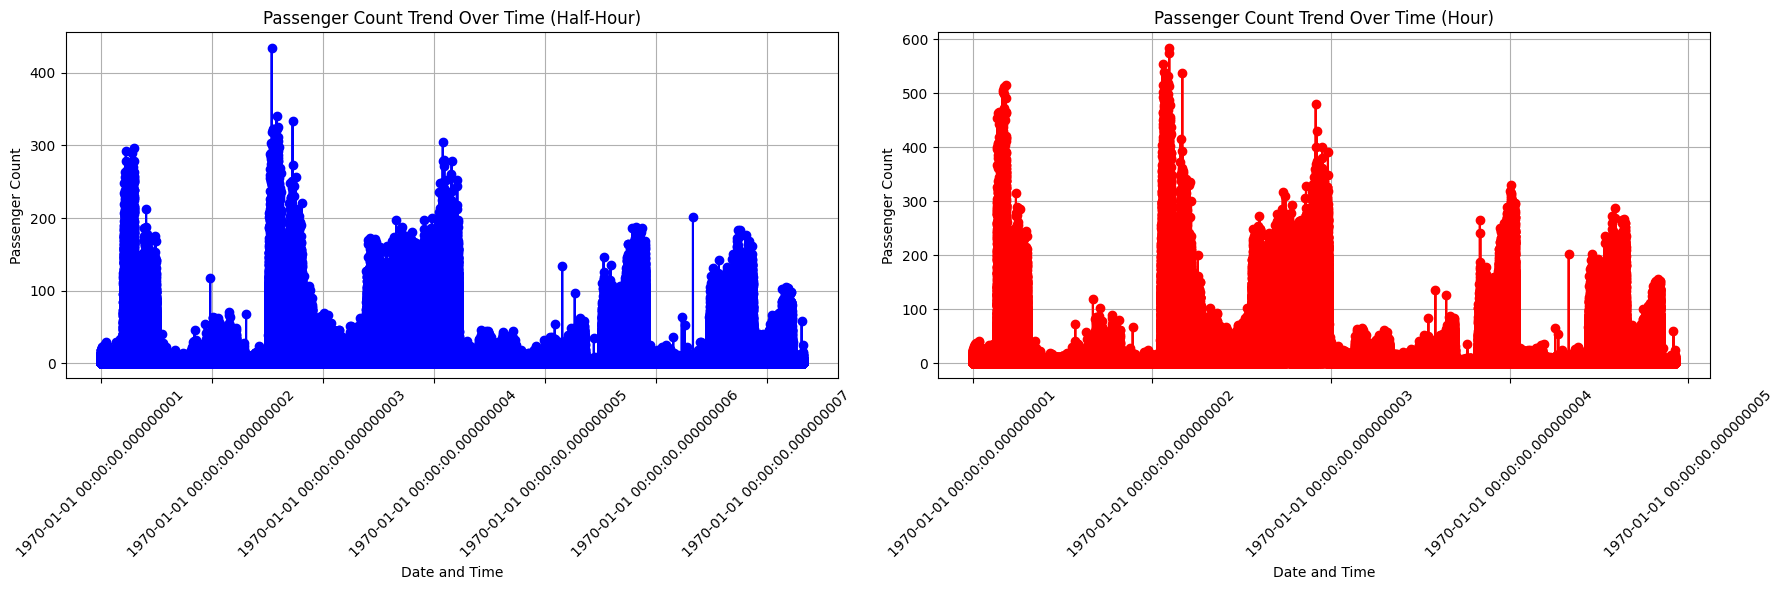

In [10]:
# Create a 2-column grid of subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Plot half_hour data
axs[0].plot(half_hour.index, half_hour['Passenger_Count'], marker='o', color='b', linestyle='-')
axs[0].set_xlabel('Date and Time')
axs[0].set_ylabel('Passenger Count')
axs[0].set_title('Passenger Count Trend Over Time (Half-Hour)')
axs[0].set_xticklabels(half_hour.index, rotation=45)  # Set x-axis labels with rotation
axs[0].grid(True)

# Plot hour data
axs[1].plot(hour.index, hour['Passenger_Count'], marker='o', color='r', linestyle='-')
axs[1].set_xlabel('Date and Time')
axs[1].set_ylabel('Passenger Count')
axs[1].set_title('Passenger Count Trend Over Time (Hour)')
axs[1].set_xticklabels(hour.index, rotation=45)  # Set x-axis labels with rotation
axs[1].grid(True)

# Remove the spacing between subplots
fig.tight_layout()

# Display the plots
plt.show()

 ### Passenger Count Comparison Between Half-Hour and Hourly Data (Date Only)

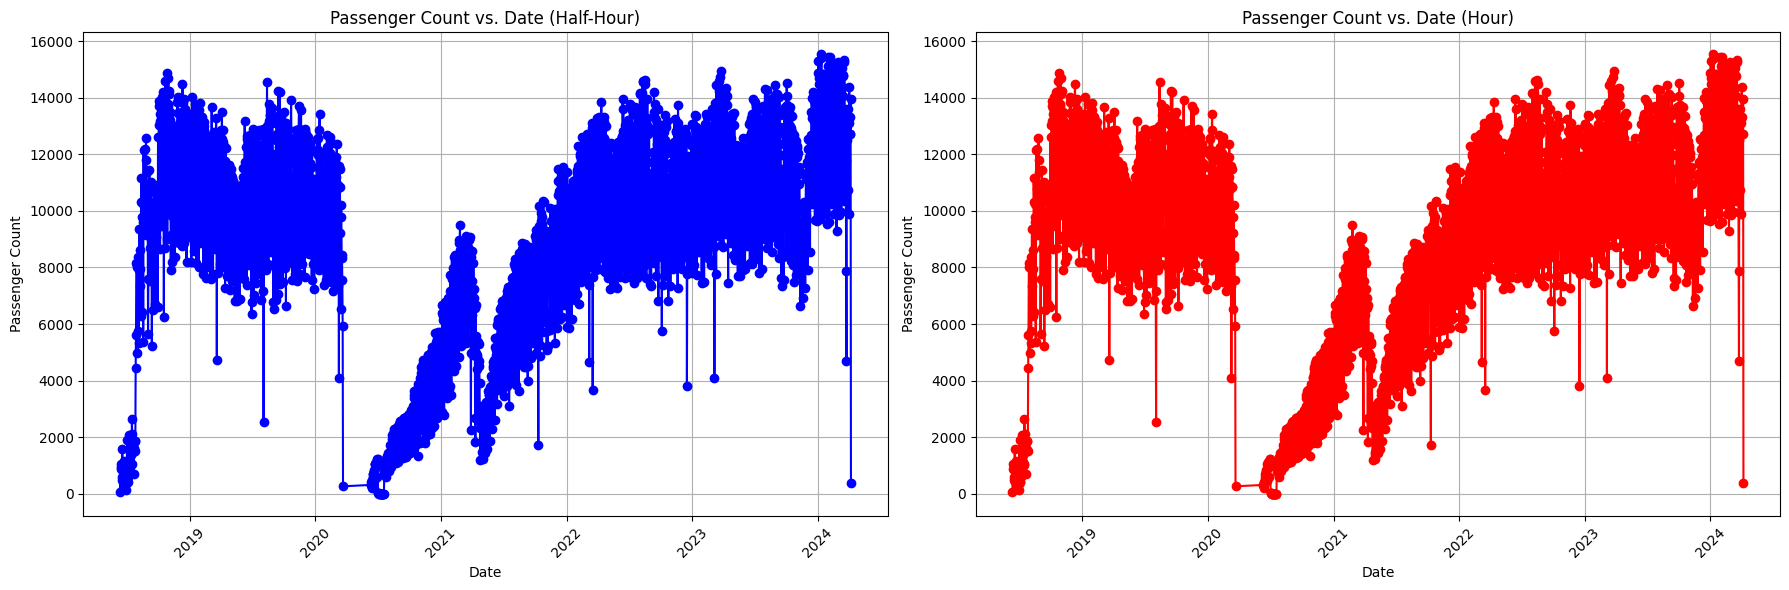

In [11]:
# Convert 'Date_Time' column to datetime
hour['Date_Time'] = pd.to_datetime(hour['Date_Time'])

# Extract Date and Time into separate columns
hour['Date'] = hour['Date_Time'].dt.date
hour['Time'] = hour['Date_Time'].dt.time

# Group by Date and sum the Passenger_Count
df_hour_date = hour.groupby('Date')['Passenger_Count'].sum().reset_index()

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Plot for half_hour data
axs[0].plot(df_hour_date['Date'], df_hour_date['Passenger_Count'], marker='o', color='b')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Passenger Count')
axs[0].set_title('Passenger Count vs. Date (Half-Hour)')
axs[0].tick_params(axis='x', rotation=45)
axs[0].grid(True)

# Plot for hour data
axs[1].plot(df_hour_date['Date'], df_hour_date['Passenger_Count'], marker='o', color='r')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Passenger Count')
axs[1].set_title('Passenger Count vs. Date (Hour)')
axs[1].tick_params(axis='x', rotation=45)
axs[1].grid(True)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

## Detailed line plots for individual years

In [33]:
hour['Year'] = hour['Date_Time'].dt.year
half_hour['Year'] = half_hour['Date_Time'].dt.year

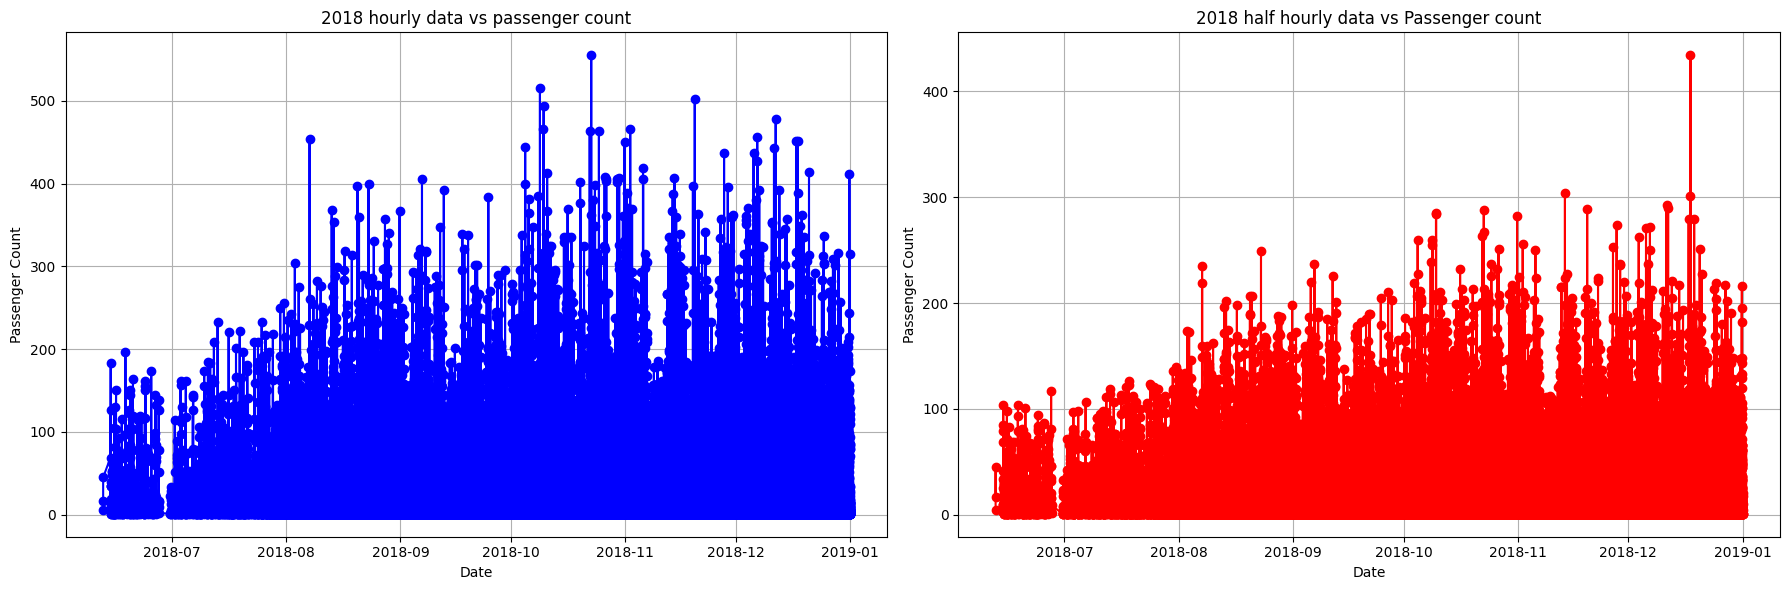

In [39]:
hour2018 = hour[hour['Year']==2018]
halfhour2018 =half_hour[half_hour['Year'] == 2018]

hour2018.sort_values(by='Date_Time', inplace=True)
halfhour2018.sort_values(by='Date_Time', inplace=True)

fig, axs = plt.subplots(1,2,figsize=(18,6))

axs[0].plot(hour2018['Date_Time'], hour2018['Passenger_Count'], marker='o', color='b')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Passenger Count')
axs[0].set_title('2018 hourly data vs passenger count')
axs[0].grid(True)

axs[1].plot(halfhour2018['Date_Time'], halfhour2018['Passenger_Count'], marker='o', color='r')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Passenger Count')
axs[1].set_title('2018 half hourly data vs Passenger count')
axs[1].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
hour2019 = hour[hour['Year']==2019]
halfhour2019 =half_hour[half_hour['Year'] == 2019]

hour2020.sort_values(by='Date_Time', inplace=True)
halfhour2020.sort_values(by='Date_Time', inplace=True)

fig, axs = plt.subplots(1,2,figsize=(18,6))

axs[0].plot(hour2020['Date_Time'], hour2020['Passenger_Count'], marker='o', color='b')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Passenger Count')
axs[0].set_title('2020 hourly data vs passenger count')
axs[0].grid(True)

axs[1].plot(halfhour2020['Date_Time'], halfhour2020['Passenger_Count'], marker='o', color='r')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Passenger Count')
axs[1].set_title('2020 half hourly data vs Passenger count')
axs[1].grid(True)

plt.tight_layout()
plt.show()

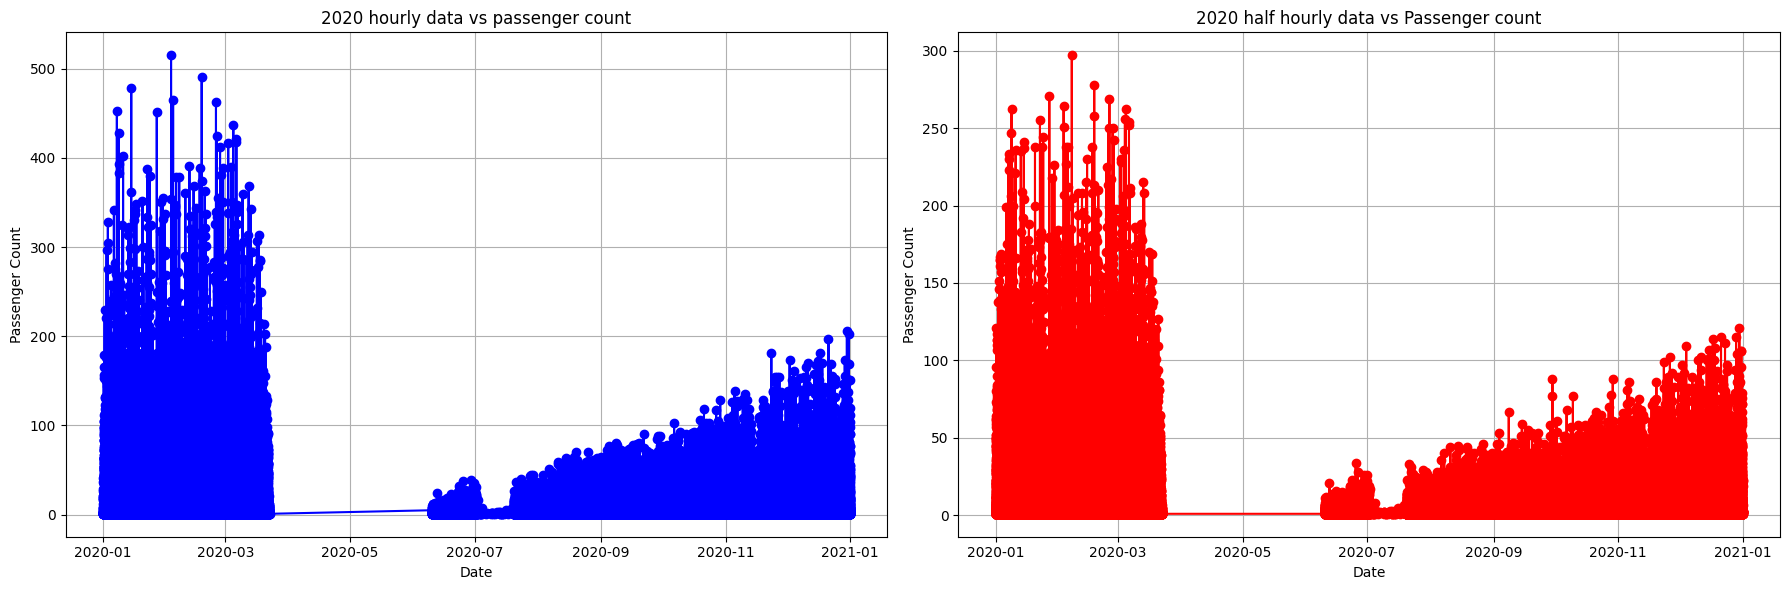

In [42]:
hour2020 = hour[hour['Year']==2020]
halfhour2020 =half_hour[half_hour['Year'] == 2020]

hour2020.sort_values(by='Date_Time', inplace=True)
halfhour2020.sort_values(by='Date_Time', inplace=True)

fig, axs = plt.subplots(1,2,figsize=(18,6))

axs[0].plot(hour2020['Date_Time'], hour2020['Passenger_Count'], marker='o', color='b')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Passenger Count')
axs[0].set_title('2020 hourly data vs passenger count')
axs[0].grid(True)

axs[1].plot(halfhour2020['Date_Time'], halfhour2020['Passenger_Count'], marker='o', color='r')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Passenger Count')
axs[1].set_title('2020 half hourly data vs Passenger count')
axs[1].grid(True)

plt.tight_layout()
plt.show()

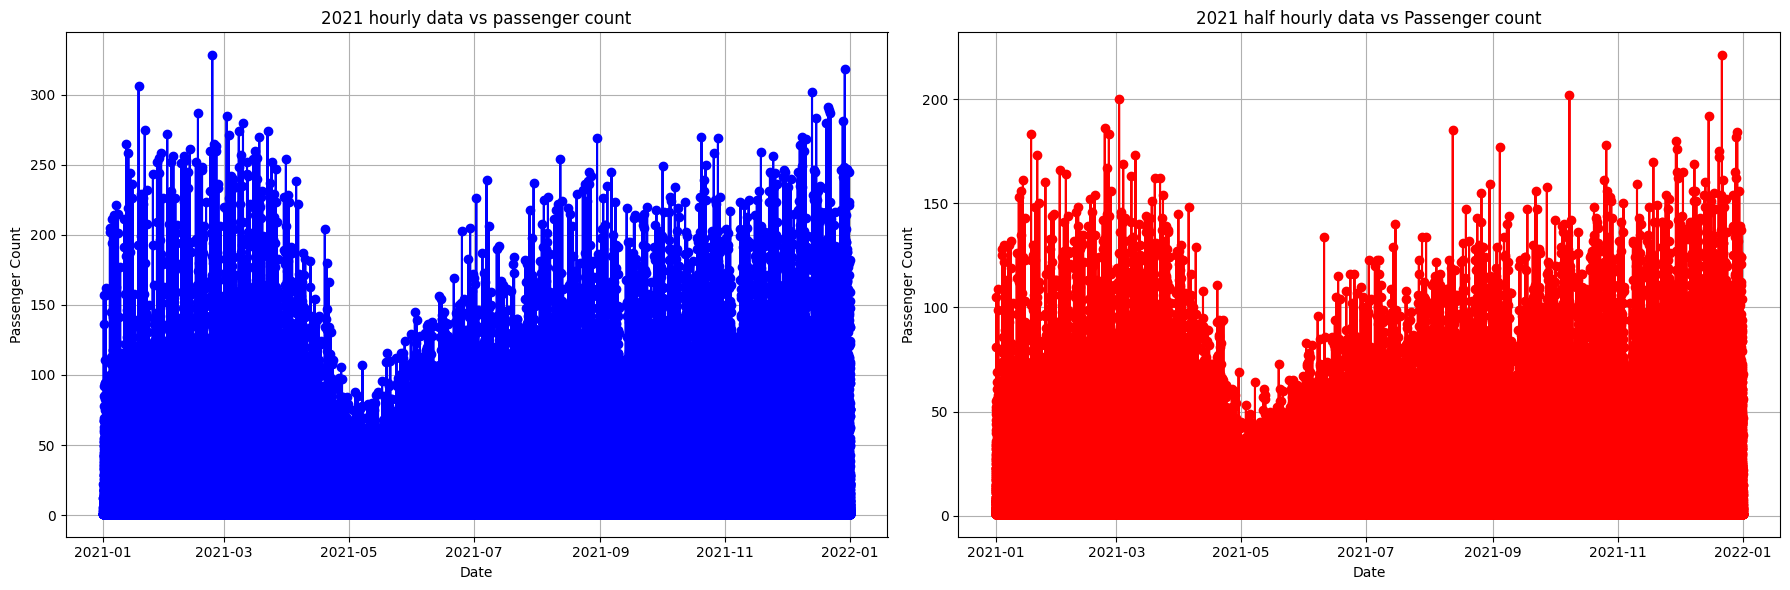

In [45]:
hour2021 = hour[hour['Year']==2021]
halfhour2021 =half_hour[half_hour['Year'] == 2021]

hour2021.sort_values(by='Date_Time', inplace=True)
halfhour2021.sort_values(by='Date_Time', inplace=True)

fig, axs = plt.subplots(1,2,figsize=(18,6))

axs[0].plot(hour2021['Date_Time'], hour2021['Passenger_Count'], marker='o', color='b')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Passenger Count')
axs[0].set_title('2021 hourly data vs passenger count')
axs[0].grid(True)

axs[1].plot(halfhour2021['Date_Time'], halfhour2021['Passenger_Count'], marker='o', color='r')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Passenger Count')
axs[1].set_title('2021 half hourly data vs Passenger count')
axs[1].grid(True)

plt.tight_layout()
plt.show()

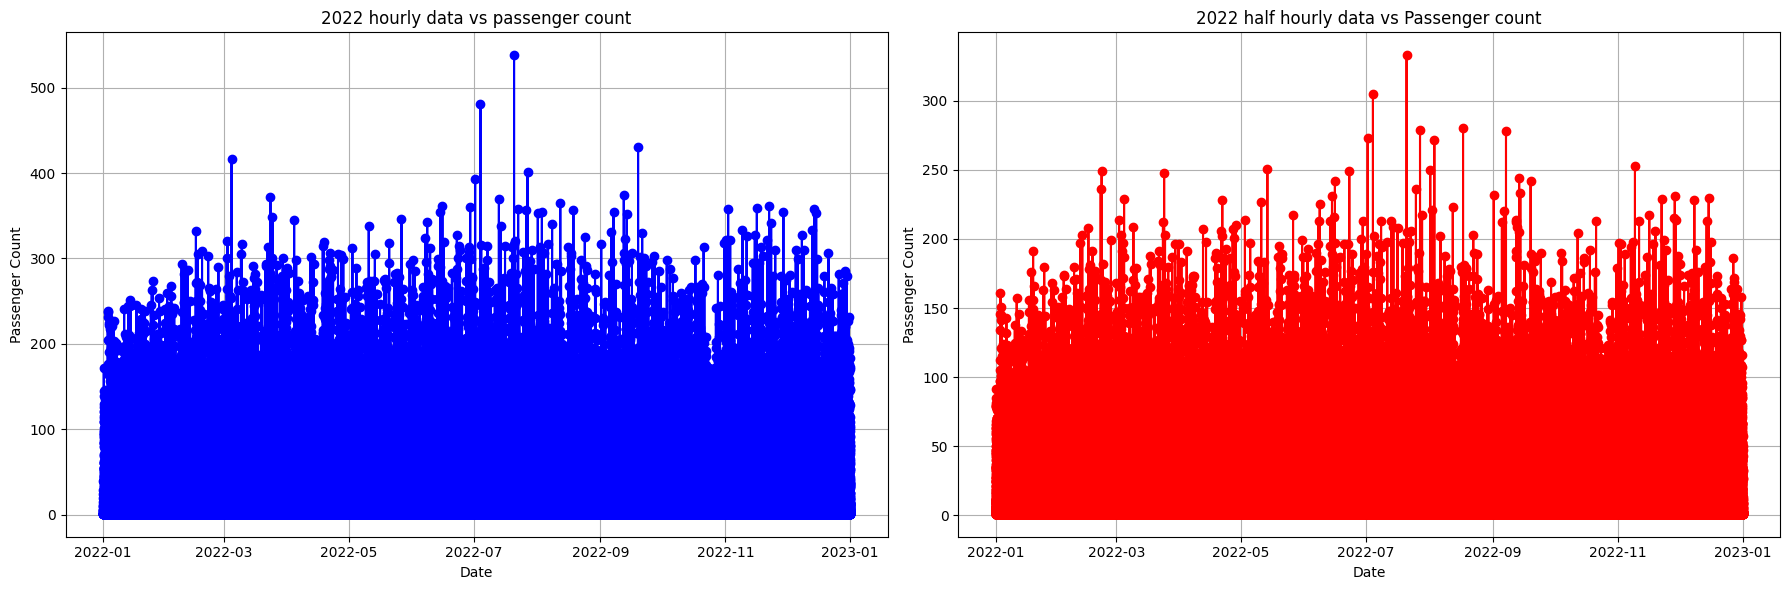

In [68]:
hour2022 = hour[hour['Year']==2022]
halfhour2022 =half_hour[half_hour['Year'] == 2022]

hour2022.sort_values(by='Date_Time', inplace=True)
halfhour2022.sort_values(by='Date_Time', inplace=True)

fig, axs = plt.subplots(1,2,figsize=(18,6))

axs[0].plot(hour2022['Date_Time'], hour2022['Passenger_Count'], marker='o', color='b')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Passenger Count')
axs[0].set_title('2022 hourly data vs passenger count')
axs[0].grid(True)

axs[1].plot(halfhour2022['Date_Time'], halfhour2022['Passenger_Count'], marker='o', color='r')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Passenger Count')
axs[1].set_title('2022 half hourly data vs Passenger count')
axs[1].grid(True)

plt.tight_layout()
plt.show()

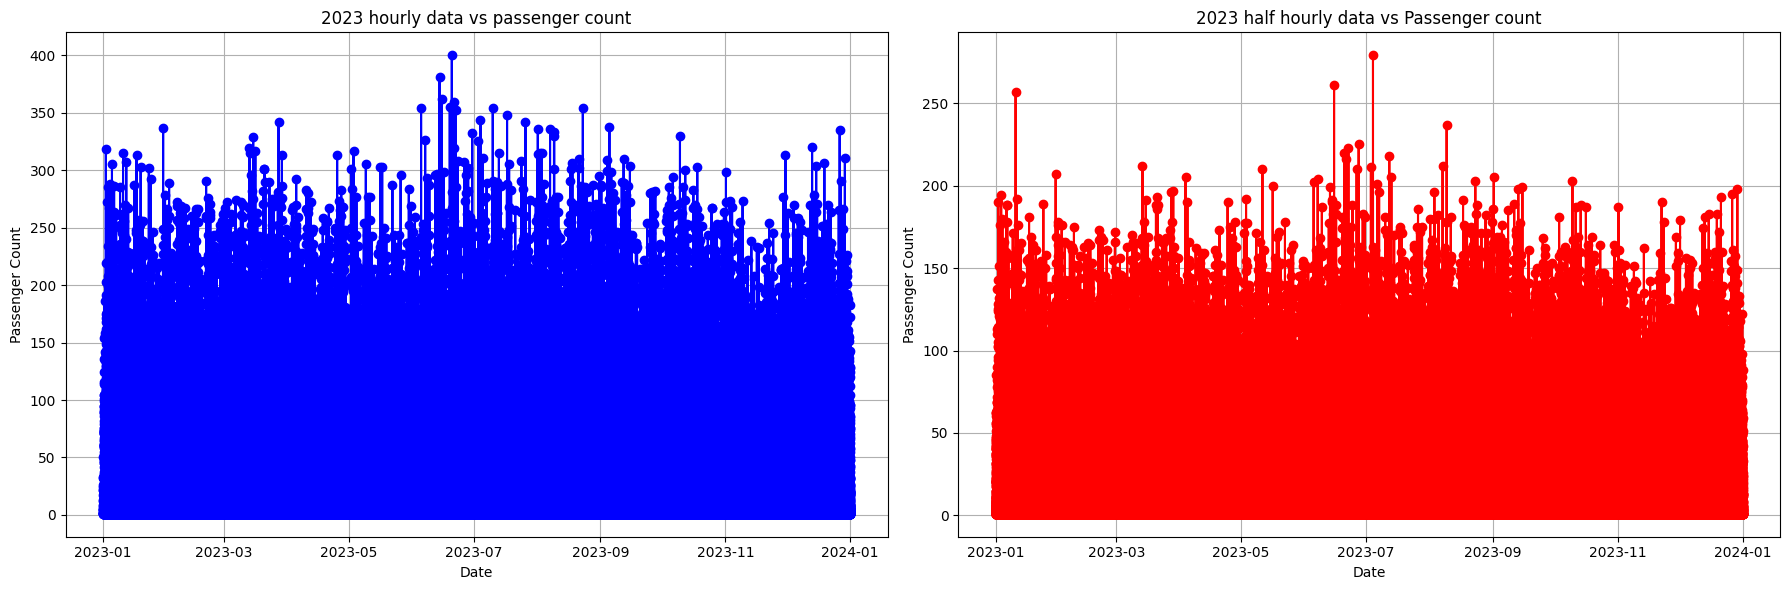

In [67]:
hour2023 = hour[hour['Year']==2023]
halfhour2023 =half_hour[half_hour['Year'] == 2023]

hour2023.sort_values(by='Date_Time', inplace=True)
halfhour2023.sort_values(by='Date_Time', inplace=True)

fig, axs = plt.subplots(1,2,figsize=(18,6))

axs[0].plot(hour2023['Date_Time'], hour2023['Passenger_Count'], marker='o', color='b')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Passenger Count')
axs[0].set_title('2023 hourly data vs passenger count')
axs[0].grid(True)

axs[1].plot(halfhour2023['Date_Time'], halfhour2023['Passenger_Count'], marker='o', color='r')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Passenger Count')
axs[1].set_title('2023 half hourly data vs Passenger count')
axs[1].grid(True)

plt.tight_layout()
plt.show()

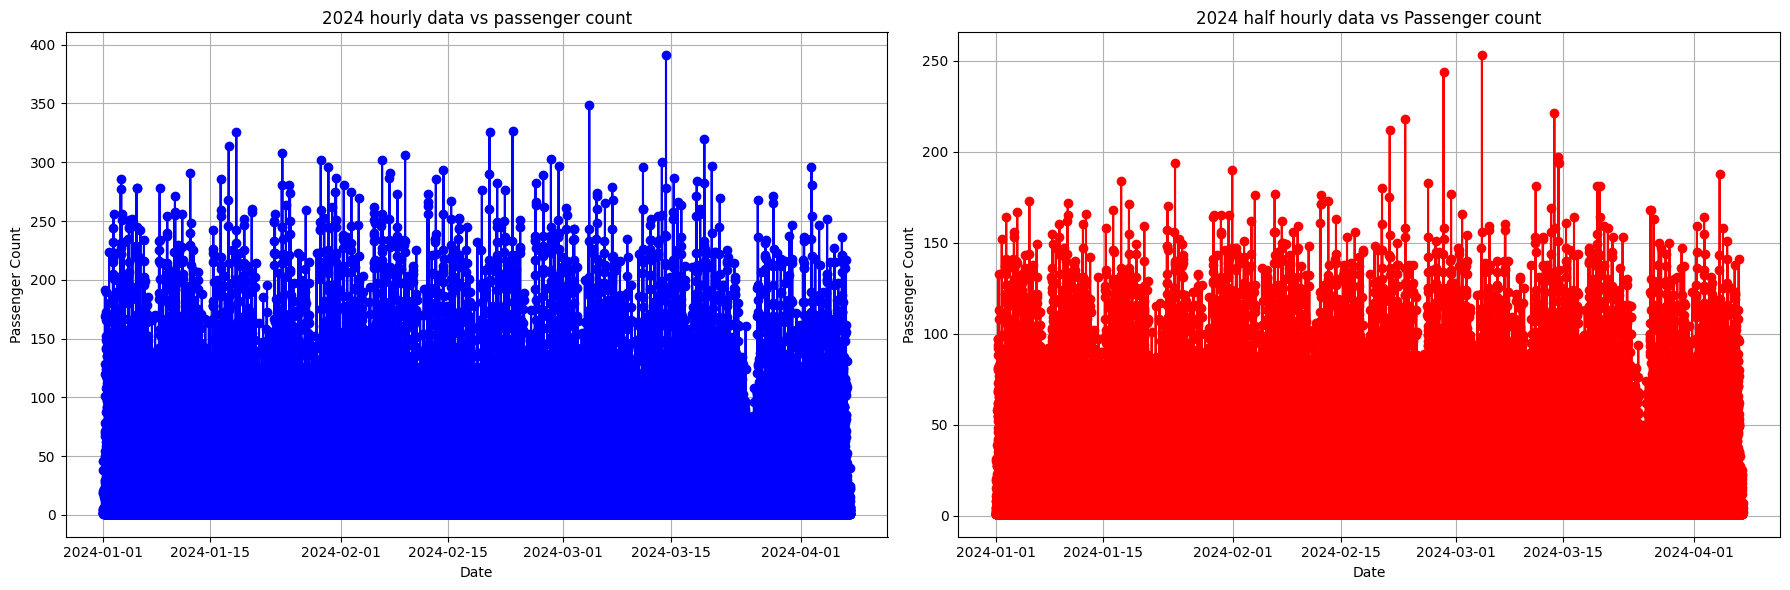

In [43]:
hour2024 = hour[hour['Year']==2024]
halfhour2024 =half_hour[half_hour['Year'] == 2024]

hour2024.sort_values(by='Date_Time', inplace=True)
halfhour2024.sort_values(by='Date_Time', inplace=True)

fig, axs = plt.subplots(1,2,figsize=(18,6))

axs[0].plot(hour2024['Date_Time'], hour2024['Passenger_Count'], marker='o', color='b')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Passenger Count')
axs[0].set_title('2024 hourly data vs passenger count')
axs[0].grid(True)

axs[1].plot(halfhour2024['Date_Time'], halfhour2024['Passenger_Count'], marker='o', color='r')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Passenger Count')
axs[1].set_title('2024 half hourly data vs Passenger count')
axs[1].grid(True)

plt.tight_layout()
plt.show()

## Comparision between time trends between years

In [85]:
half_hour

,Passenger_Count,Hour,Minute,Time_Slot,Year
Date_Time,,,,,
2018-06-12 07:30:00,17,7,30,15,2018
2018-06-12 08:00:00,5,8,0,16,2018
2018-06-12 08:00:00,45,8,0,16,2018
2018-06-14 08:30:00,69,8,30,17,2018
2018-06-14 08:30:00,9,8,30,17,2018
...,...,...,...,...,...
2024-04-07 08:30:00,14,8,30,17,2024
2024-04-07 08:30:00,20,8,30,17,2024
2024-04-07 09:00:00,4,9,0,18,2024


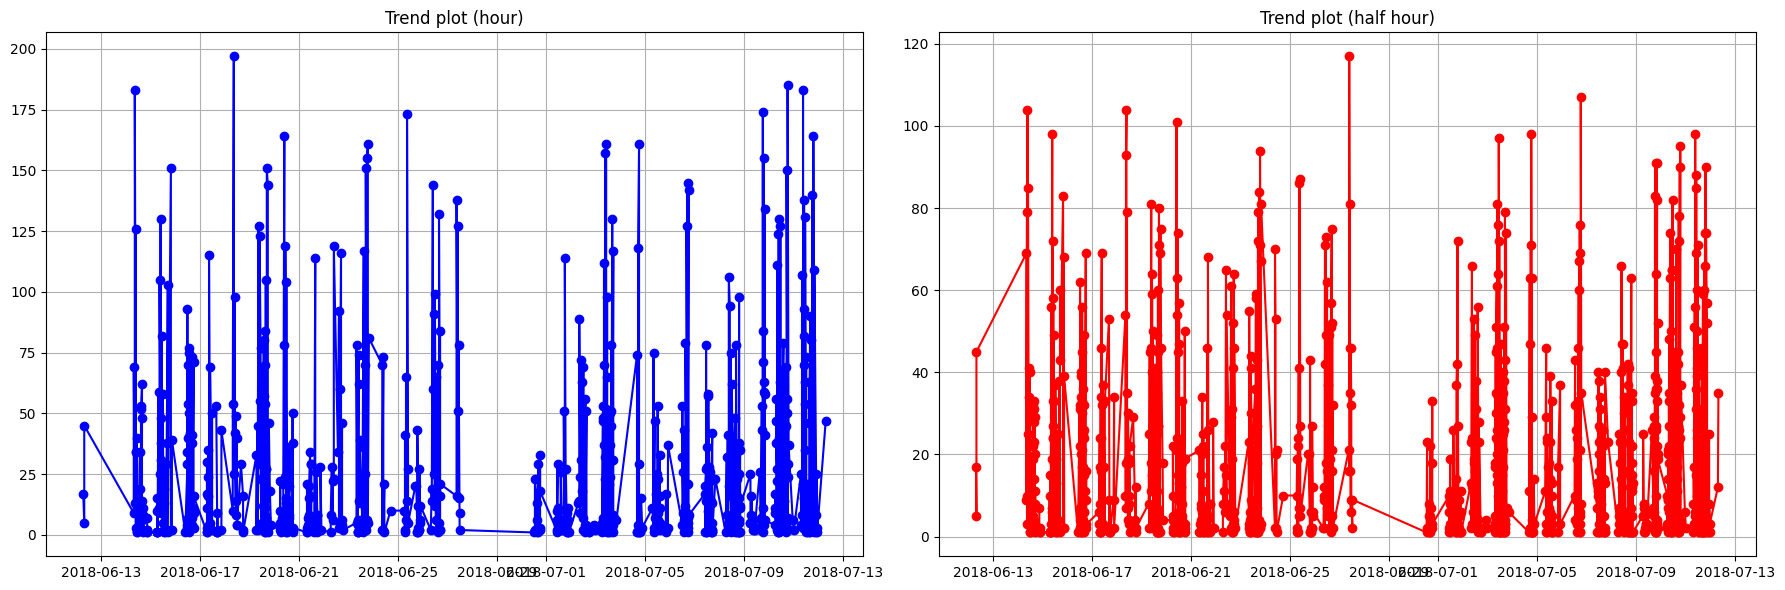

In [89]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(18,6))

ax1.plot(hour['Passenger_Count'].loc['2018-06-12 07:00:00':'2018-07-12 07:00:00'], marker='o', color='b')
ax1.set_title('Trend plot (hour)')
ax1.grid(True)

ax2.plot(half_hour['Passenger_Count'].loc['2018-06-12 07:30:00':'2018-07-12 07:30:00'], marker='o', color='r')
ax2.set_title('Trend plot (half hour)')
ax2.grid(True)

plt.tight_layout()
plt.show()

## Bar plots

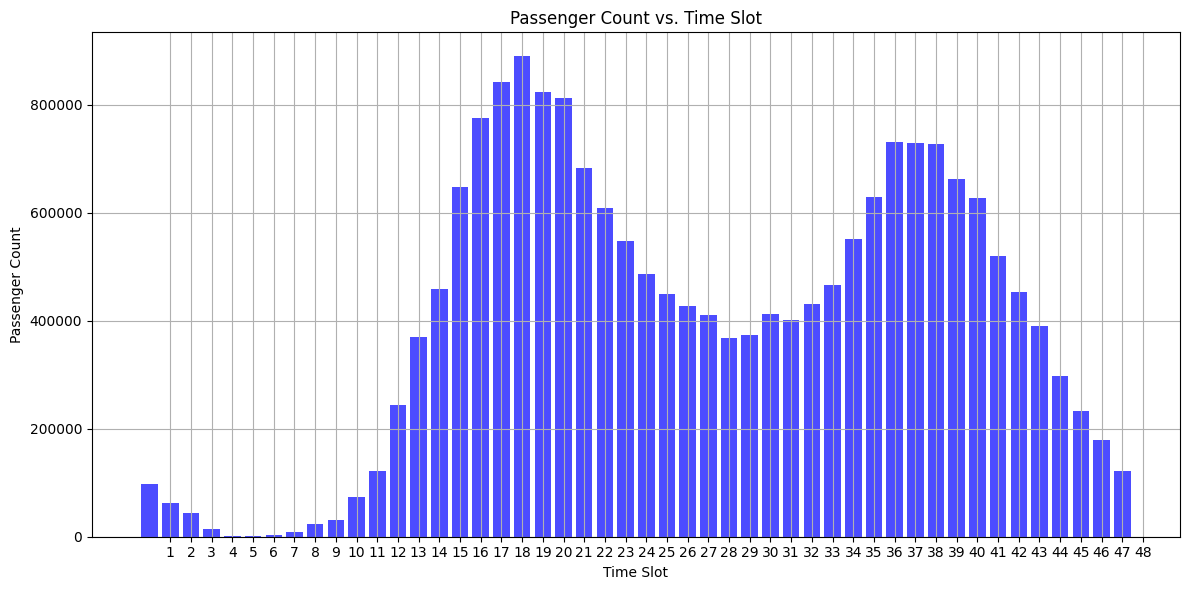

In [12]:
half_hour['Date_Time'] = pd.to_datetime(half_hour['Date_Time'])
half_hour['Hour'] = half_hour['Date_Time'].dt.hour
half_hour['Minute'] = half_hour['Date_Time'].dt.minute
half_hour['Time_Slot'] = half_hour['Hour'] * 2 + half_hour['Minute'] // 30

# Group by Time_Slot and sum the Passenger_Count
df_time_slot = half_hour.groupby('Time_Slot')['Passenger_Count'].sum().reset_index()
# Plotting the data
plt.figure(figsize=(12, 6))
plt.bar(df_time_slot['Time_Slot'], df_time_slot['Passenger_Count'], color='b', alpha=0.7)
# Adding labels and title
plt.xlabel('Time Slot')
plt.ylabel('Passenger Count')
plt.title('Passenger Count vs. Time Slot')
# Set x-ticks to display all values from 1 to 48
plt.xticks(range(1, 49))
# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

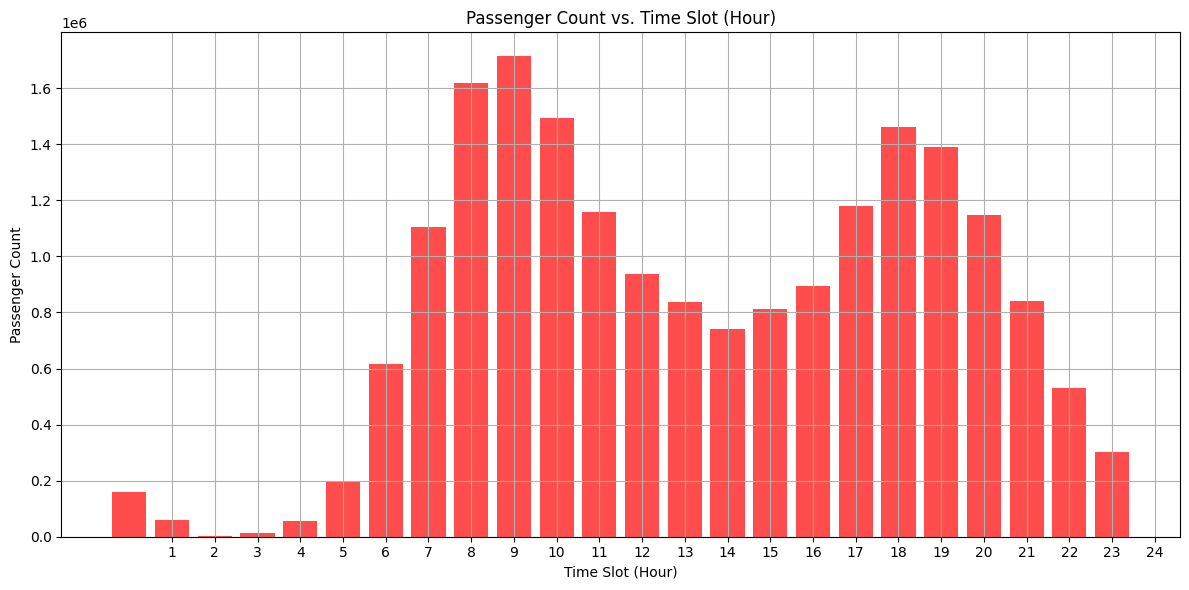

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'hour' is your DataFrame with Date_Time and Passenger_Count columns

# Convert Date_Time to datetime
hour['Date_Time'] = pd.to_datetime(hour['Date_Time'])

# Extract Hour from Date_Time
hour['Hour'] = hour['Date_Time'].dt.hour

# Calculate Time_Slot for 1-24 hours
hour['Time_Slot'] = hour['Hour']

# Group by Time_Slot and sum the Passenger_Count
df_time_slot_hour = hour.groupby('Time_Slot')['Passenger_Count'].sum().reset_index()

# Plotting the data
plt.figure(figsize=(12, 6))
plt.bar(df_time_slot_hour['Time_Slot'], df_time_slot_hour['Passenger_Count'], color='r', alpha=0.7)

# Adding labels and title
plt.xlabel('Time Slot (Hour)')
plt.ylabel('Passenger Count')
plt.title('Passenger Count vs. Time Slot (Hour)')

# Set x-ticks to display all values from 1 to 24
plt.xticks(range(1, 25))

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

# Compairing both Half Hour and Hour Timeslots for Passenger Count

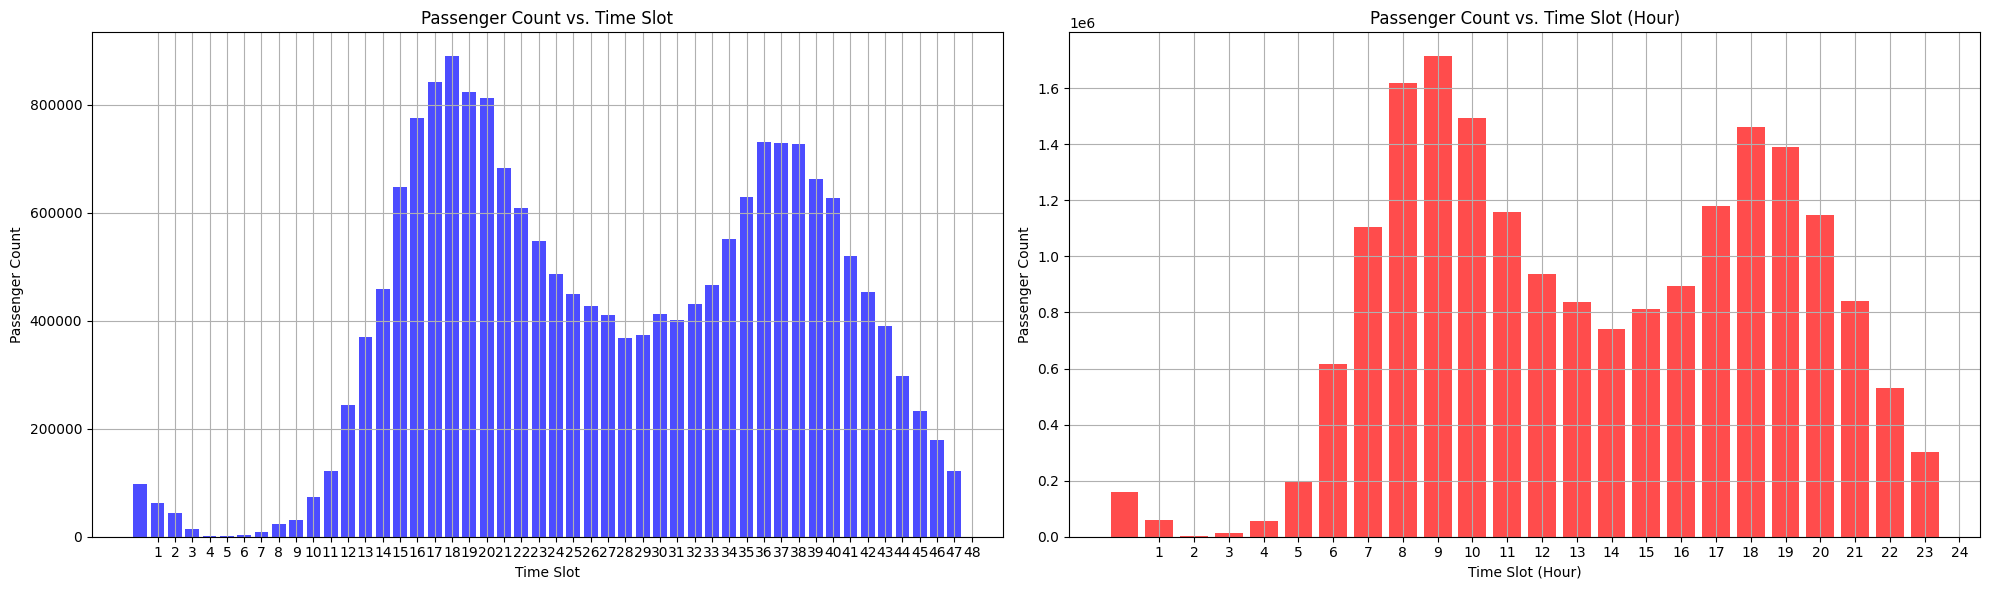

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Code for half_hour dataset
half_hour['Date_Time'] = pd.to_datetime(half_hour['Date_Time'])
half_hour['Hour'] = half_hour['Date_Time'].dt.hour
half_hour['Minute'] = half_hour['Date_Time'].dt.minute
half_hour['Time_Slot'] = half_hour['Hour'] * 2 + half_hour['Minute'] // 30

df_time_slot = half_hour.groupby('Time_Slot')['Passenger_Count'].sum().reset_index()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# Plotting the data for half_hour on the left subplot
ax1.bar(df_time_slot['Time_Slot'], df_time_slot['Passenger_Count'], color='b', alpha=0.7)
ax1.set_xlabel('Time Slot')
ax1.set_ylabel('Passenger Count')
ax1.set_title('Passenger Count vs. Time Slot')
ax1.set_xticks(range(1, 49))
ax1.grid(True)

# Code for hour dataset
hour['Date_Time'] = pd.to_datetime(hour['Date_Time'])
hour['Hour'] = hour['Date_Time'].dt.hour
hour['Time_Slot'] = hour['Hour']

df_time_slot_hour = hour.groupby('Time_Slot')['Passenger_Count'].sum().reset_index()

# Plotting the data for hour on the right subplot
ax2.bar(df_time_slot_hour['Time_Slot'], df_time_slot_hour['Passenger_Count'], color='r', alpha=0.7)
ax2.set_xlabel('Time Slot (Hour)')
ax2.set_ylabel('Passenger Count')
ax2.set_title('Passenger Count vs. Time Slot (Hour)')
ax2.set_xticks(range(1, 25))
ax2.grid(True)

plt.tight_layout()
plt.show()

NameError: name 'axa' is not defined

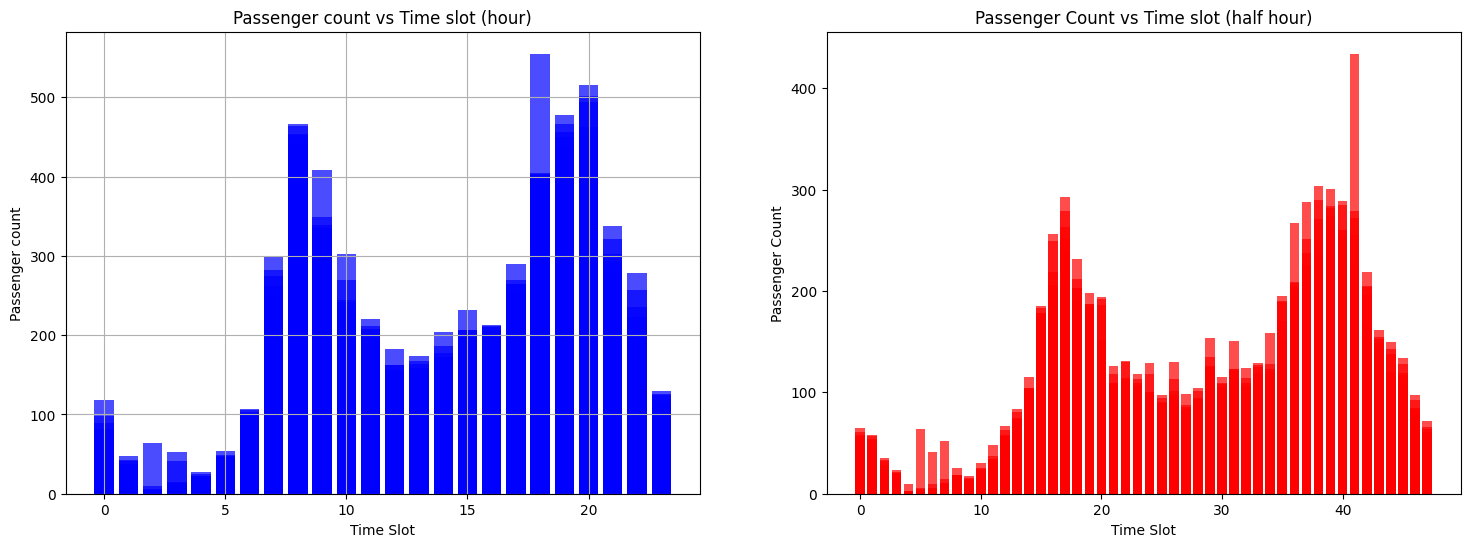

In [47]:
fig, axs = plt.subplots(1,2,figsize=(18,6))

axs[0].bar(hour2018['Time_Slot'], hour2018['Passenger_Count'], color='b', alpha=0.7)
axs[0].set_xlabel('Time Slot')
axs[0].set_ylabel('Passenger count')
axs[0].set_title('Passenger count vs Time slot (hour)')
axs[0].grid(True)

axs[1].bar(halfhour2018['Time_Slot'], halfhour2018['Passenger_Count'], color='r', alpha=0.7)
axs[1].set_xlabel('Time Slot')
axs[1].set_ylabel('Passenger Count')
axs[1].set_title('Passenger Count vs Time slot (half hour)')
axs[1].grid(True)

plt.tight_layout()
plt.show()

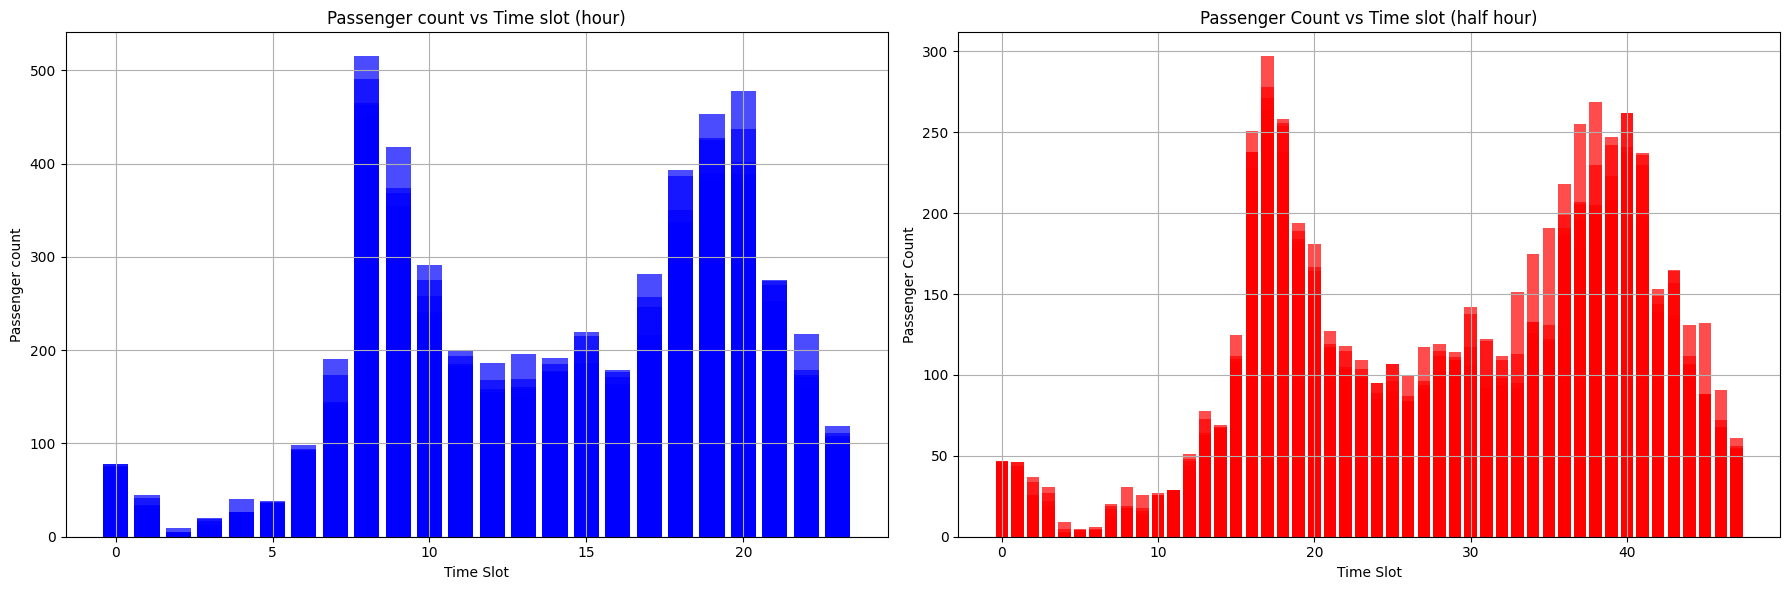

In [49]:
fig, axs = plt.subplots(1,2,figsize=(18,6))

axs[0].bar(hour2020['Time_Slot'], hour2020['Passenger_Count'], color='b', alpha=0.7)
axs[0].set_xlabel('Time Slot')
axs[0].set_ylabel('Passenger count')
axs[0].set_title('Passenger count vs Time slot (hour)')
axs[0].grid(True)

axs[1].bar(halfhour2020['Time_Slot'], halfhour2020['Passenger_Count'], color='r', alpha=0.7)
axs[1].set_xlabel('Time Slot')
axs[1].set_ylabel('Passenger Count')
axs[1].set_title('Passenger Count vs Time slot (half hour)')
axs[1].grid(True)

plt.tight_layout()
plt.show()

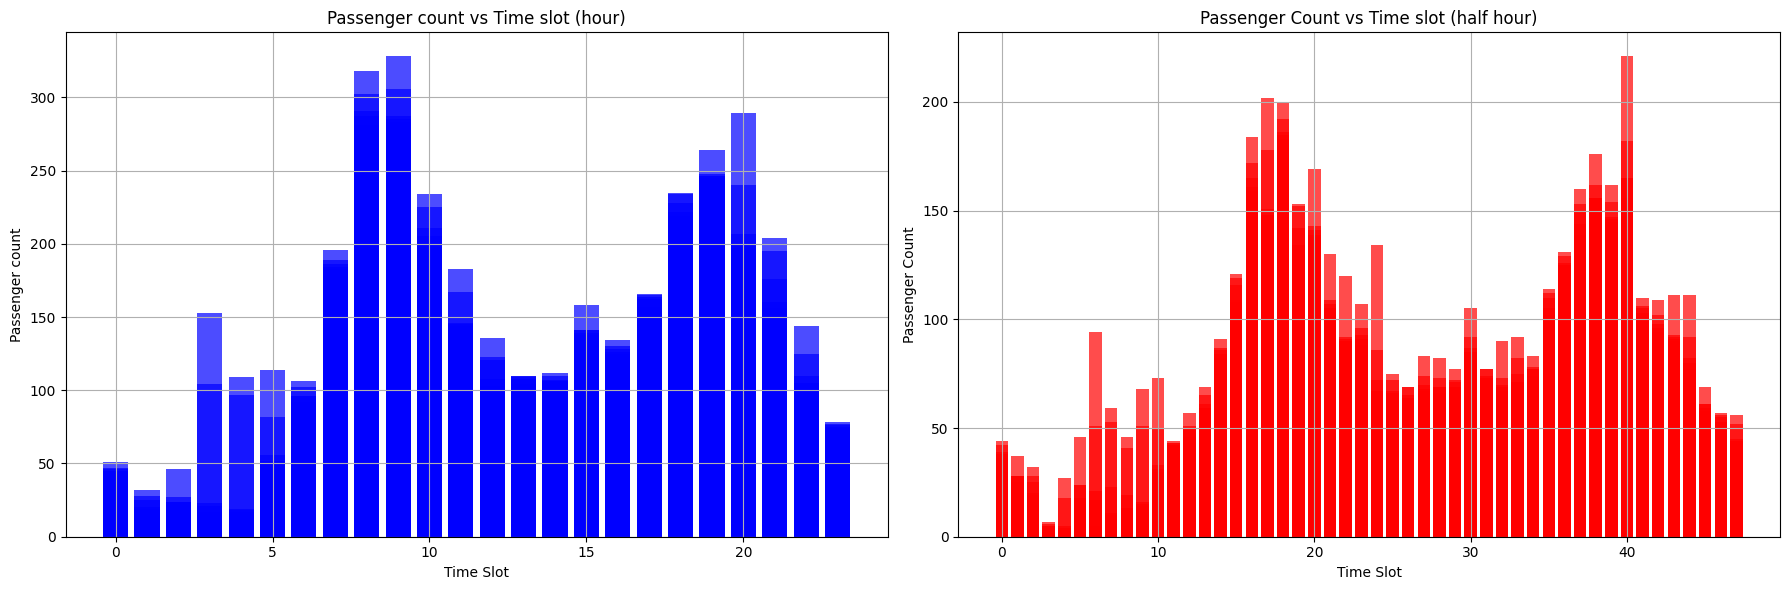

In [50]:
fig, axs = plt.subplots(1,2,figsize=(18,6))

axs[0].bar(hour2021['Time_Slot'], hour2021['Passenger_Count'], color='b', alpha=0.7)
axs[0].set_xlabel('Time Slot')
axs[0].set_ylabel('Passenger count')
axs[0].set_title('Passenger count vs Time slot (hour)')
axs[0].grid(True)

axs[1].bar(halfhour2021['Time_Slot'], halfhour2021['Passenger_Count'], color='r', alpha=0.7)
axs[1].set_xlabel('Time Slot')
axs[1].set_ylabel('Passenger Count')
axs[1].set_title('Passenger Count vs Time slot (half hour)')
axs[1].grid(True)

plt.tight_layout()
plt.show()

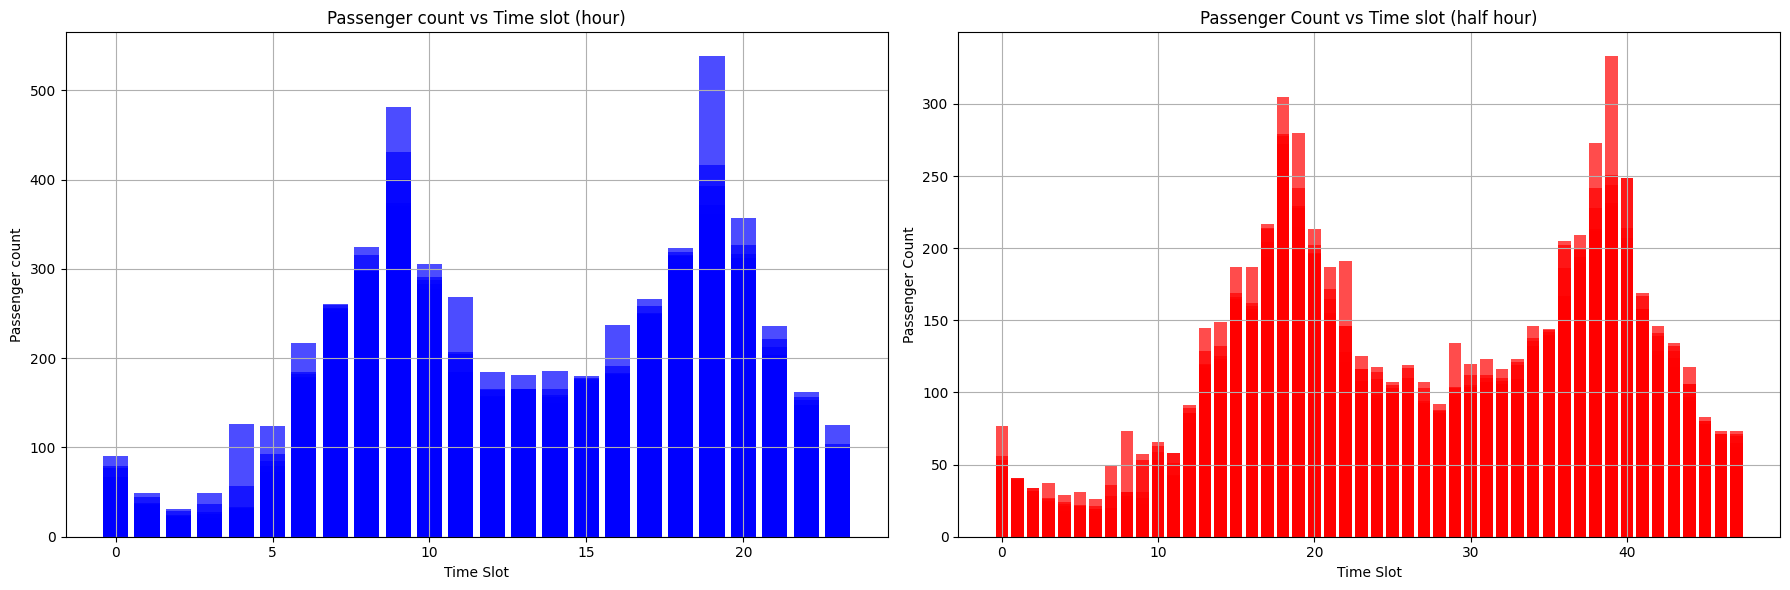

In [111]:
fig, axs = plt.subplots(1,2,figsize=(18,6))

axs[0].bar(hour2022['Time_Slot'], hour2022['Passenger_Count'], color='b', alpha=0.7)
axs[0].set_xlabel('Time Slot')
axs[0].set_ylabel('Passenger count')
axs[0].set_title('Passenger count vs Time slot (hour)')
axs[0].grid(True)

axs[1].bar(halfhour2022['Time_Slot'], halfhour2022['Passenger_Count'], color='r', alpha=0.7)
axs[1].set_xlabel('Time Slot')
axs[1].set_ylabel('Passenger Count')
axs[1].set_title('Passenger Count vs Time slot (half hour)')
axs[1].grid(True)

plt.tight_layout()
plt.show()

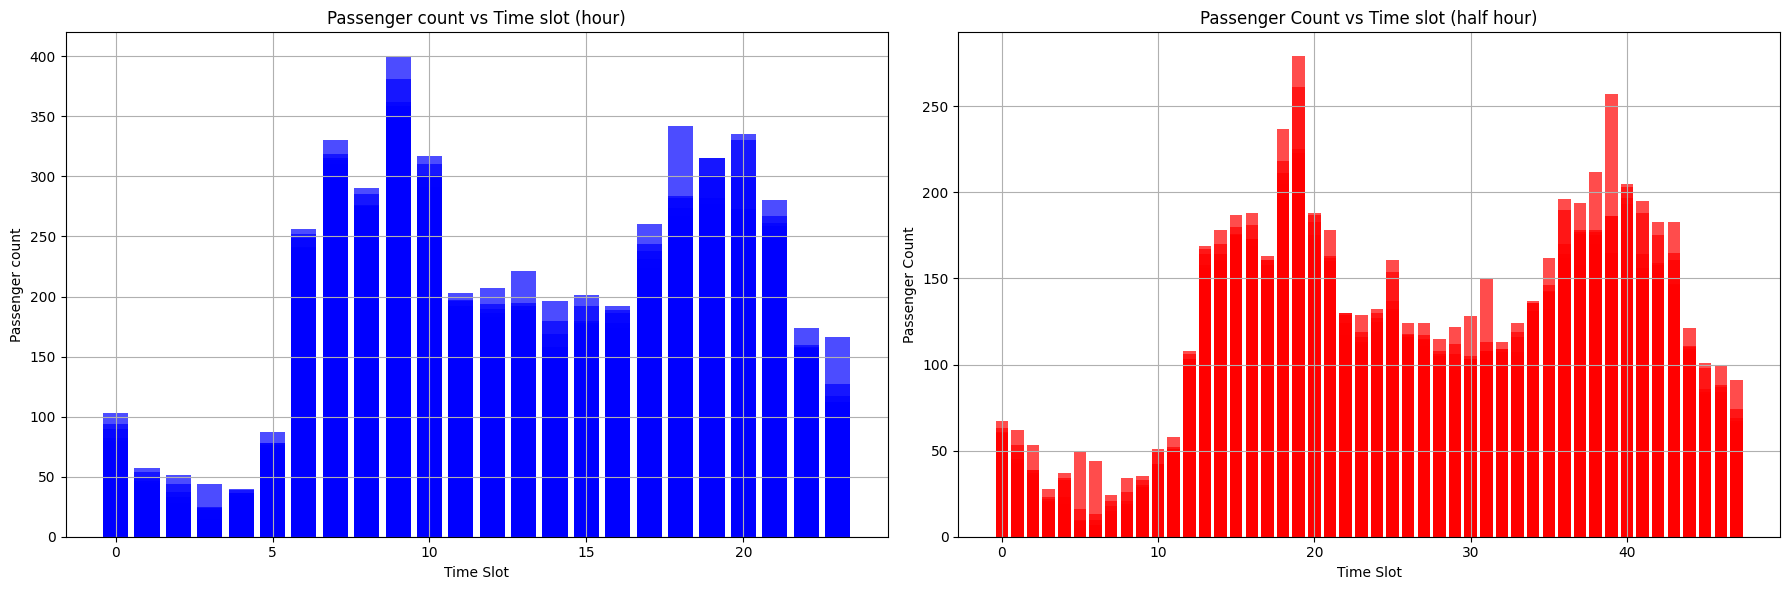

In [112]:
fig, axs = plt.subplots(1,2,figsize=(18,6))

axs[0].bar(hour2023['Time_Slot'], hour2023['Passenger_Count'], color='b', alpha=0.7)
axs[0].set_xlabel('Time Slot')
axs[0].set_ylabel('Passenger count')
axs[0].set_title('Passenger count vs Time slot (hour)')
axs[0].grid(True)

axs[1].bar(halfhour2023['Time_Slot'], halfhour2023['Passenger_Count'], color='r', alpha=0.7)
axs[1].set_xlabel('Time Slot')
axs[1].set_ylabel('Passenger Count')
axs[1].set_title('Passenger Count vs Time slot (half hour)')
axs[1].grid(True)

plt.tight_layout()
plt.show()

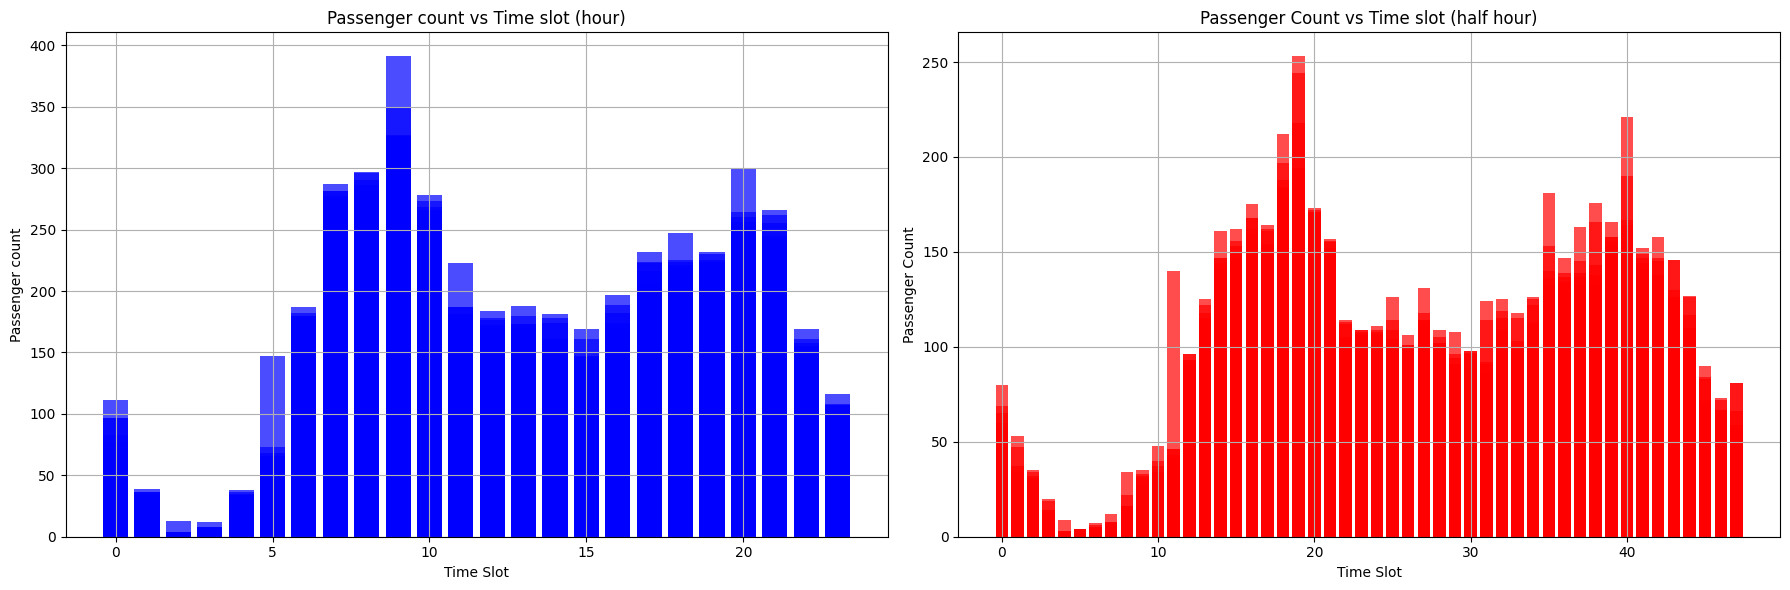

In [51]:
fig, axs = plt.subplots(1,2,figsize=(18,6))

axs[0].bar(hour2024['Time_Slot'], hour2024['Passenger_Count'], color='b', alpha=0.7)
axs[0].set_xlabel('Time Slot')
axs[0].set_ylabel('Passenger count')
axs[0].set_title('Passenger count vs Time slot (hour)')
axs[0].grid(True)

axs[1].bar(halfhour2024['Time_Slot'], halfhour2024['Passenger_Count'], color='r', alpha=0.7)
axs[1].set_xlabel('Time Slot')
axs[1].set_ylabel('Passenger Count')
axs[1].set_title('Passenger Count vs Time slot (half hour)')
axs[1].grid(True)

plt.tight_layout()
plt.show()

### Distribution Plot: the spread and potential outliers.

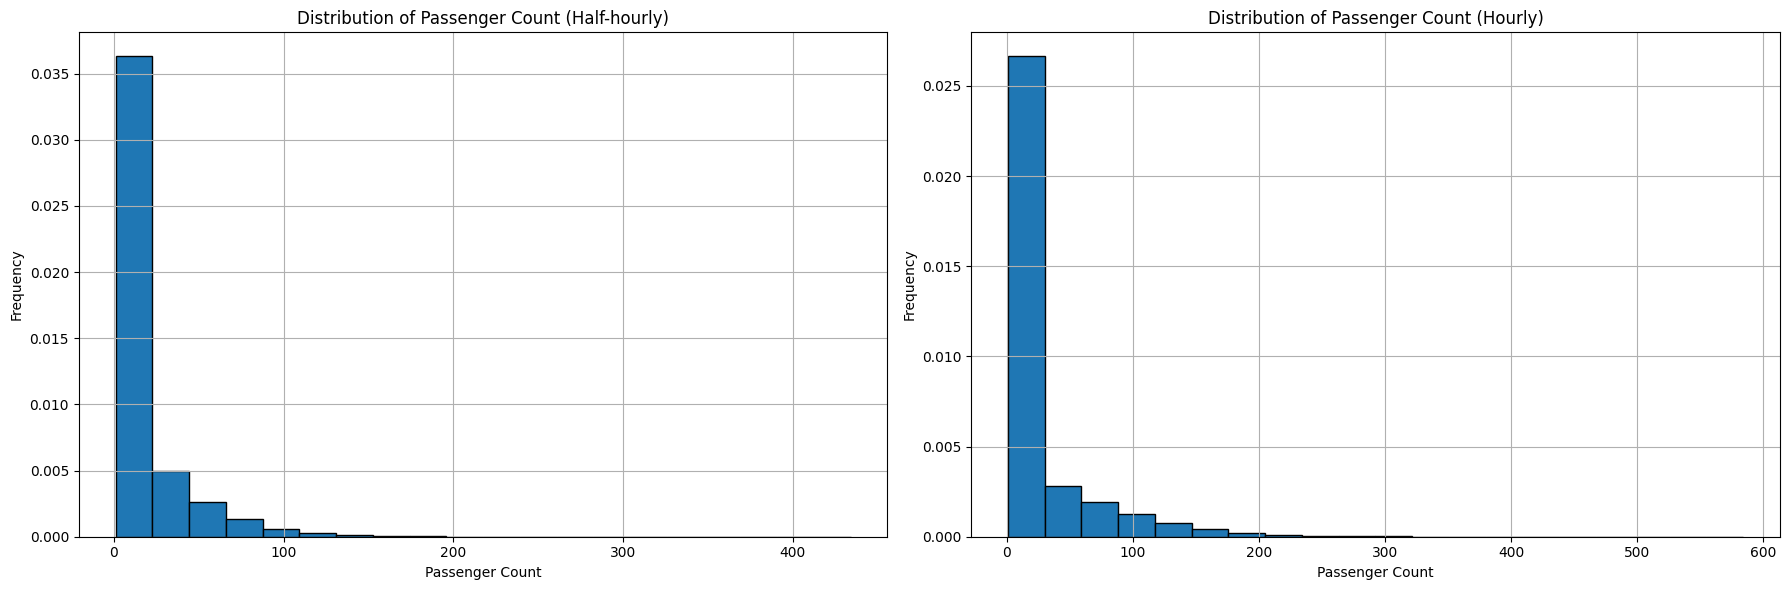

In [53]:
# Distribution plot for df1
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))  # Increase the width of the figure

# Plotting the data for df1 on the left subplot
ax1.hist(df1["Passenger_Count"], bins=20, edgecolor="black", density=True)
ax1.set_xlabel("Passenger Count")
ax1.set_ylabel("Frequency")
ax1.set_title("Distribution of Passenger Count (Half-hourly)")
ax1.grid(True)

# Distribution plot for df2
ax2.hist(df2["Passenger_Count"], bins=20, edgecolor="black", density=True)
ax2.set_xlabel("Passenger Count")
ax2.set_ylabel("Frequency")
ax2.set_title("Distribution of Passenger Count (Hourly)")
ax2.grid(True)

plt.tight_layout()
plt.show()

In [73]:
hour.set_index('Date_Time', inplace=True)

In [83]:
hour.sort_index(inplace=True)
half_hour.sort_index(inplace=True)

In [75]:
half_hour.set_index('Date_Time', inplace=True)

## Box plots

In [ ]:
hour

In [ ]:
fig, (axi1, ax2) = plt.subplots(2,1,figsize=(20,6))

sns.boxplot(hour['Time_Slot'], hour['Passenger_Count'], color='b', alpha=0.7)
ax1.set_xlabel('Time Slot')
ax1.set_ylabel('Passenger Count')
ax1.set_title('Passenger Count vs. Time Slot')
ax1.set_xticks(range(1, 49))
ax1.grid(True)


sns.boxplot(halfhour['Time_Slot'], half_hour['Passenger_Count'], color='b', alpha=0.7)
ax1.set_xlabel('Time Slot')
ax1.set_ylabel('Passenger Count')
ax1.set_title('Passenger Count vs. Time Slot')
ax1.set_xticks(range(1, 49))
ax1.grid(True)

plt.tight_layout()
plt.show()

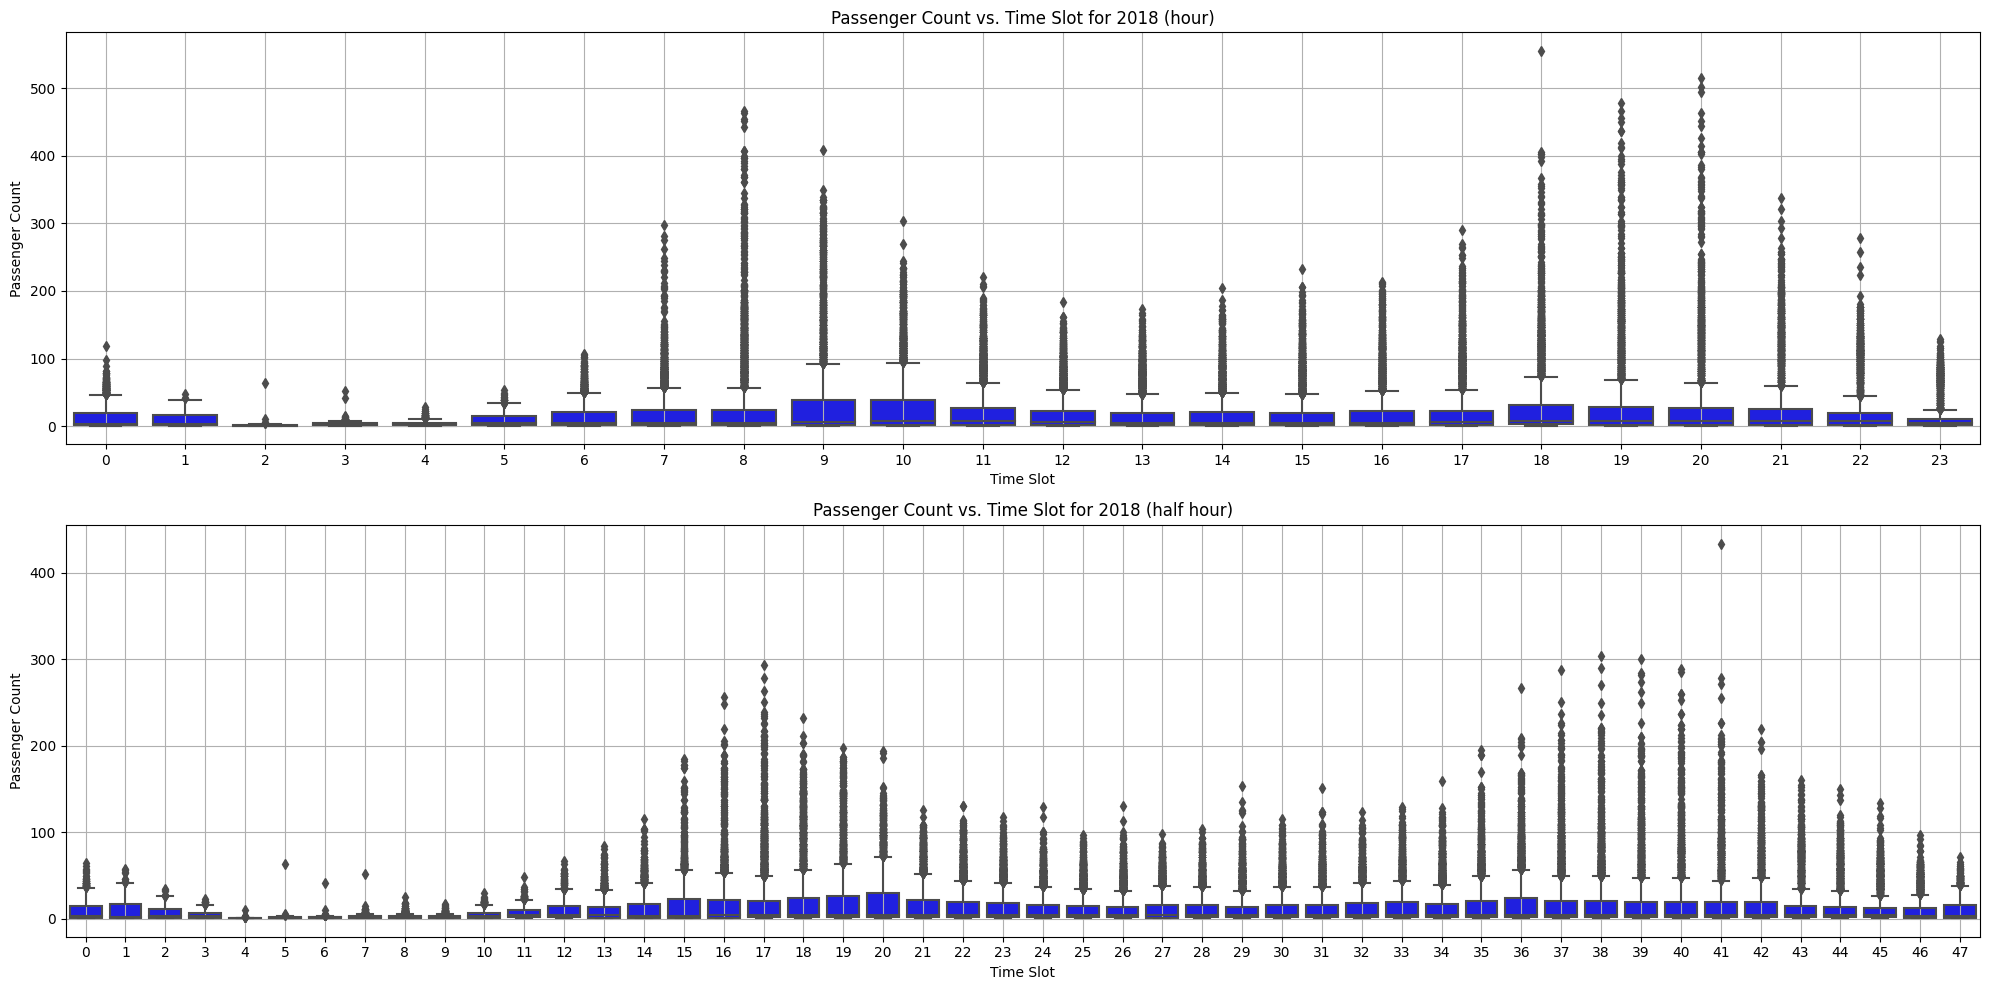

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))

sns.boxplot(x=hour2018['Time_Slot'], y=hour2018['Passenger_Count'], color='b', ax=ax1)
ax1.set_xlabel('Time Slot')
ax1.set_ylabel('Passenger Count')
ax1.set_title('Passenger Count vs. Time Slot for 2018 (hour)')
ax1.grid(True)

sns.boxplot(x=halfhour2018['Time_Slot'], y=halfhour2018['Passenger_Count'], color='b', ax=ax2)
ax2.set_xlabel('Time Slot')
ax2.set_ylabel('Passenger Count')
ax2.set_title('Passenger Count vs. Time Slot for 2018 (half hour)')
ax2.grid(True)

plt.tight_layout()
plt.show()

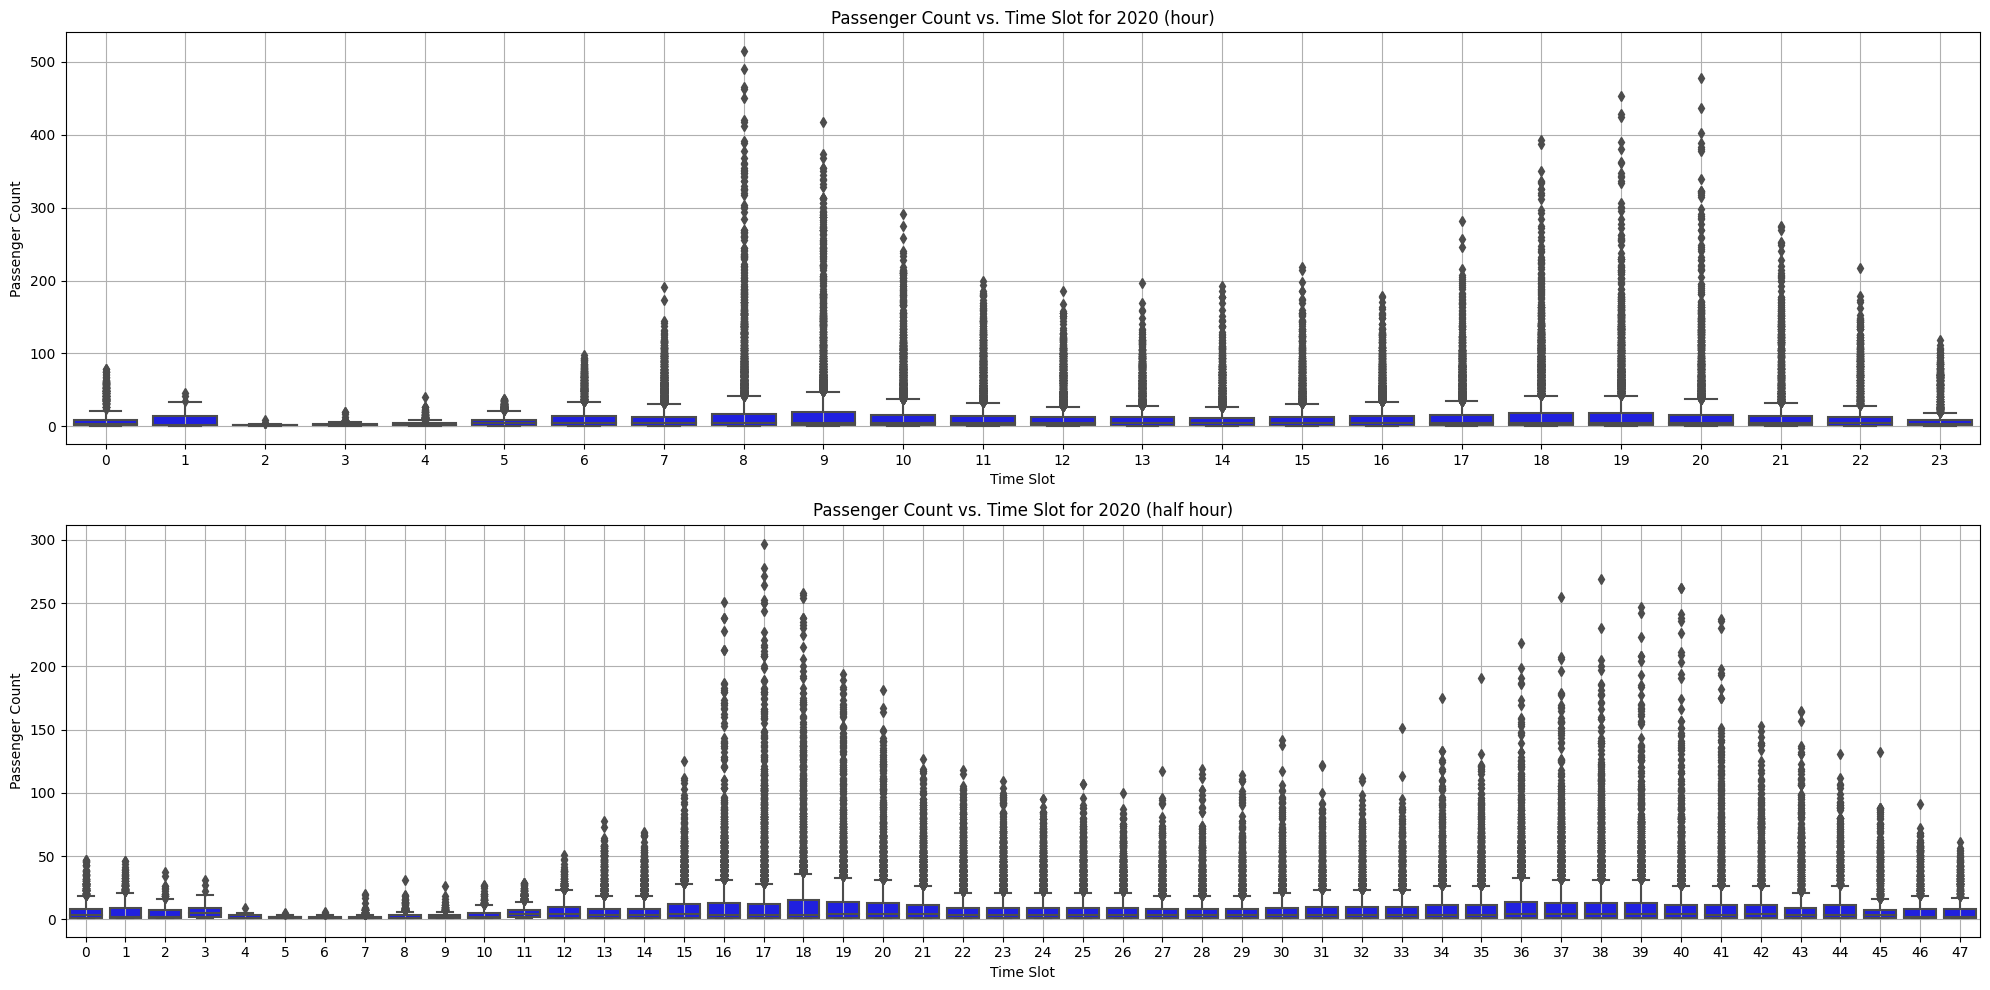

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))

sns.boxplot(x=hour2020['Time_Slot'], y=hour2020['Passenger_Count'], color='b', ax=ax1)
ax1.set_xlabel('Time Slot')
ax1.set_ylabel('Passenger Count')
ax1.set_title('Passenger Count vs. Time Slot for 2020 (hour)')
ax1.grid(True)

sns.boxplot(x=halfhour2020['Time_Slot'], y=halfhour2020['Passenger_Count'], color='b', ax=ax2)
ax2.set_xlabel('Time Slot')
ax2.set_ylabel('Passenger Count')
ax2.set_title('Passenger Count vs. Time Slot for 2020 (half hour)')
ax2.grid(True)

plt.tight_layout()
plt.show()


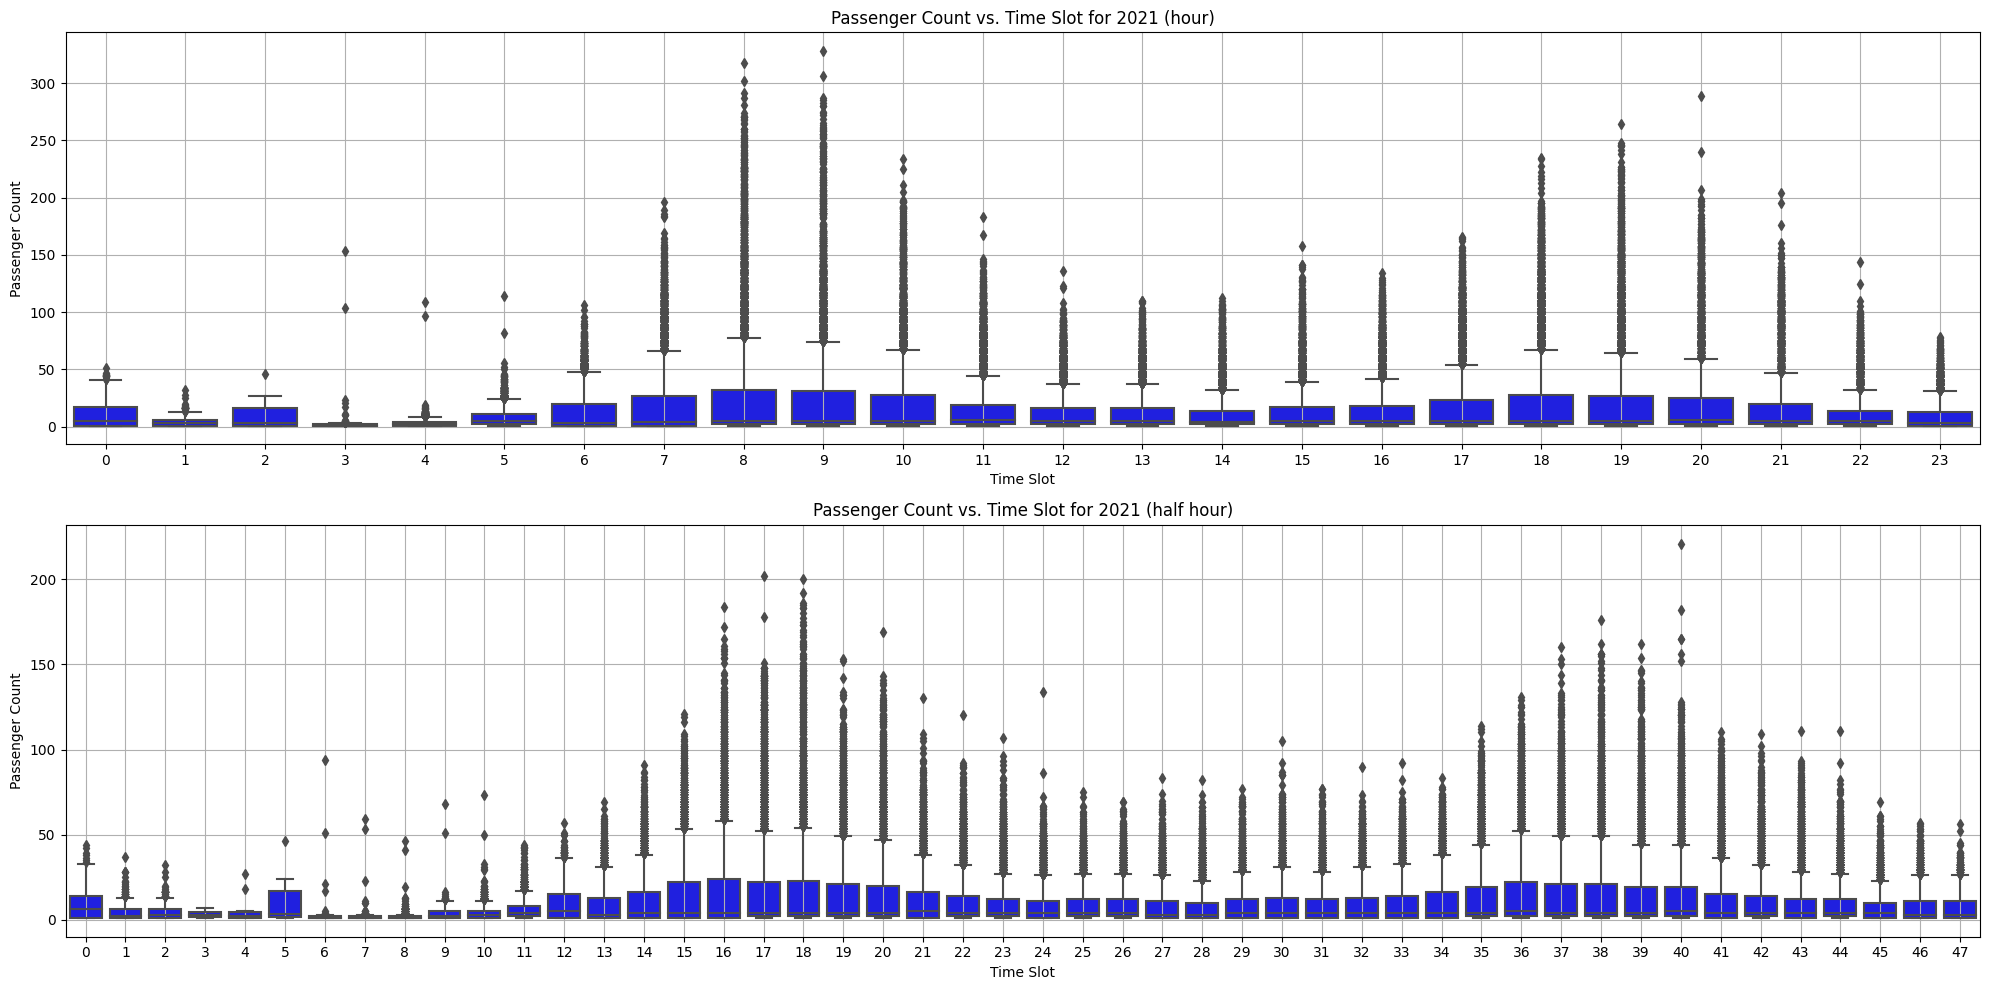

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))

sns.boxplot(x=hour2021['Time_Slot'], y=hour2021['Passenger_Count'], color='b', ax=ax1)
ax1.set_xlabel('Time Slot')
ax1.set_ylabel('Passenger Count')
ax1.set_title('Passenger Count vs. Time Slot for 2021 (hour)')
ax1.grid(True)

sns.boxplot(x=halfhour2021['Time_Slot'], y=halfhour2021['Passenger_Count'], color='b', ax=ax2)
ax2.set_xlabel('Time Slot')
ax2.set_ylabel('Passenger Count')
ax2.set_title('Passenger Count vs. Time Slot for 2021 (half hour)')
ax2.grid(True)

plt.tight_layout()
plt.show()

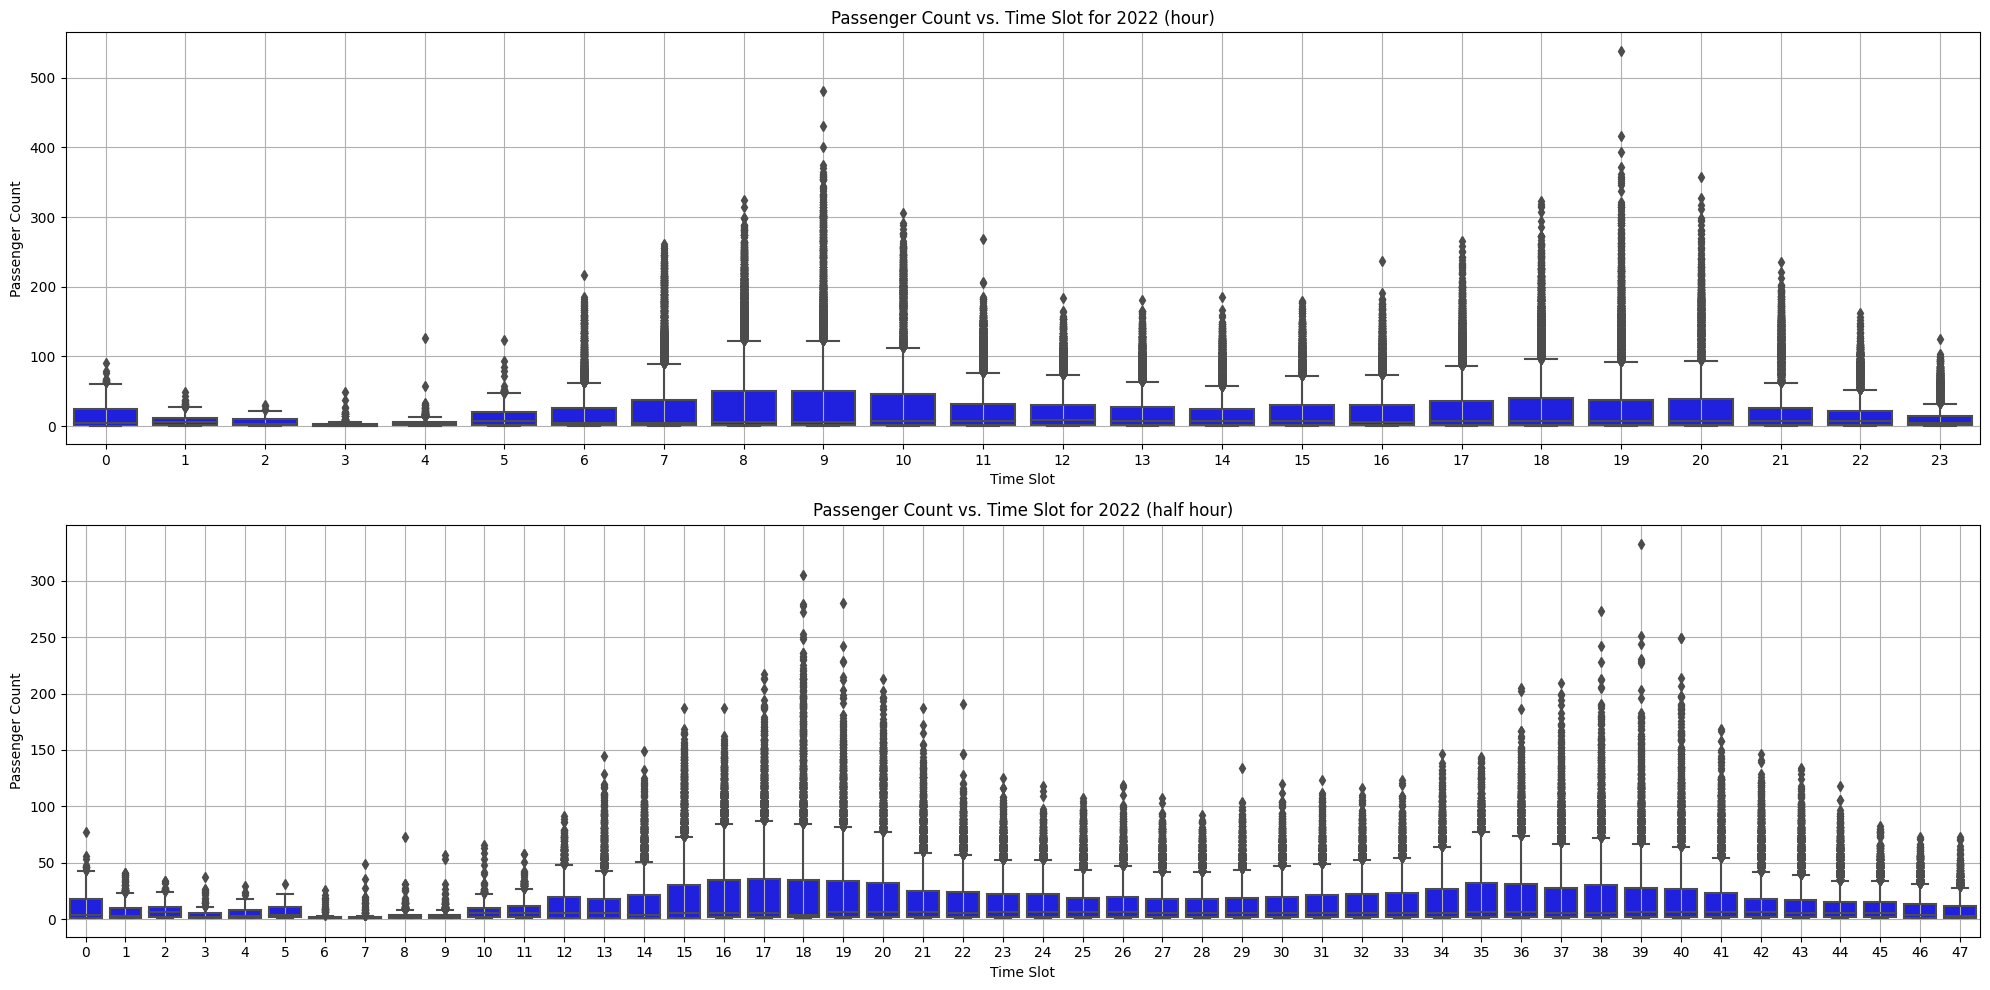

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))

sns.boxplot(x=hour2022['Time_Slot'], y=hour2022['Passenger_Count'], color='b', ax=ax1)
ax1.set_xlabel('Time Slot')
ax1.set_ylabel('Passenger Count')
ax1.set_title('Passenger Count vs. Time Slot for 2022 (hour)')
ax1.grid(True)

sns.boxplot(x=halfhour2022['Time_Slot'], y=halfhour2022['Passenger_Count'], color='b', ax=ax2)
ax2.set_xlabel('Time Slot')
ax2.set_ylabel('Passenger Count')
ax2.set_title('Passenger Count vs. Time Slot for 2022 (half hour)')
ax2.grid(True)

plt.tight_layout()
plt.show()

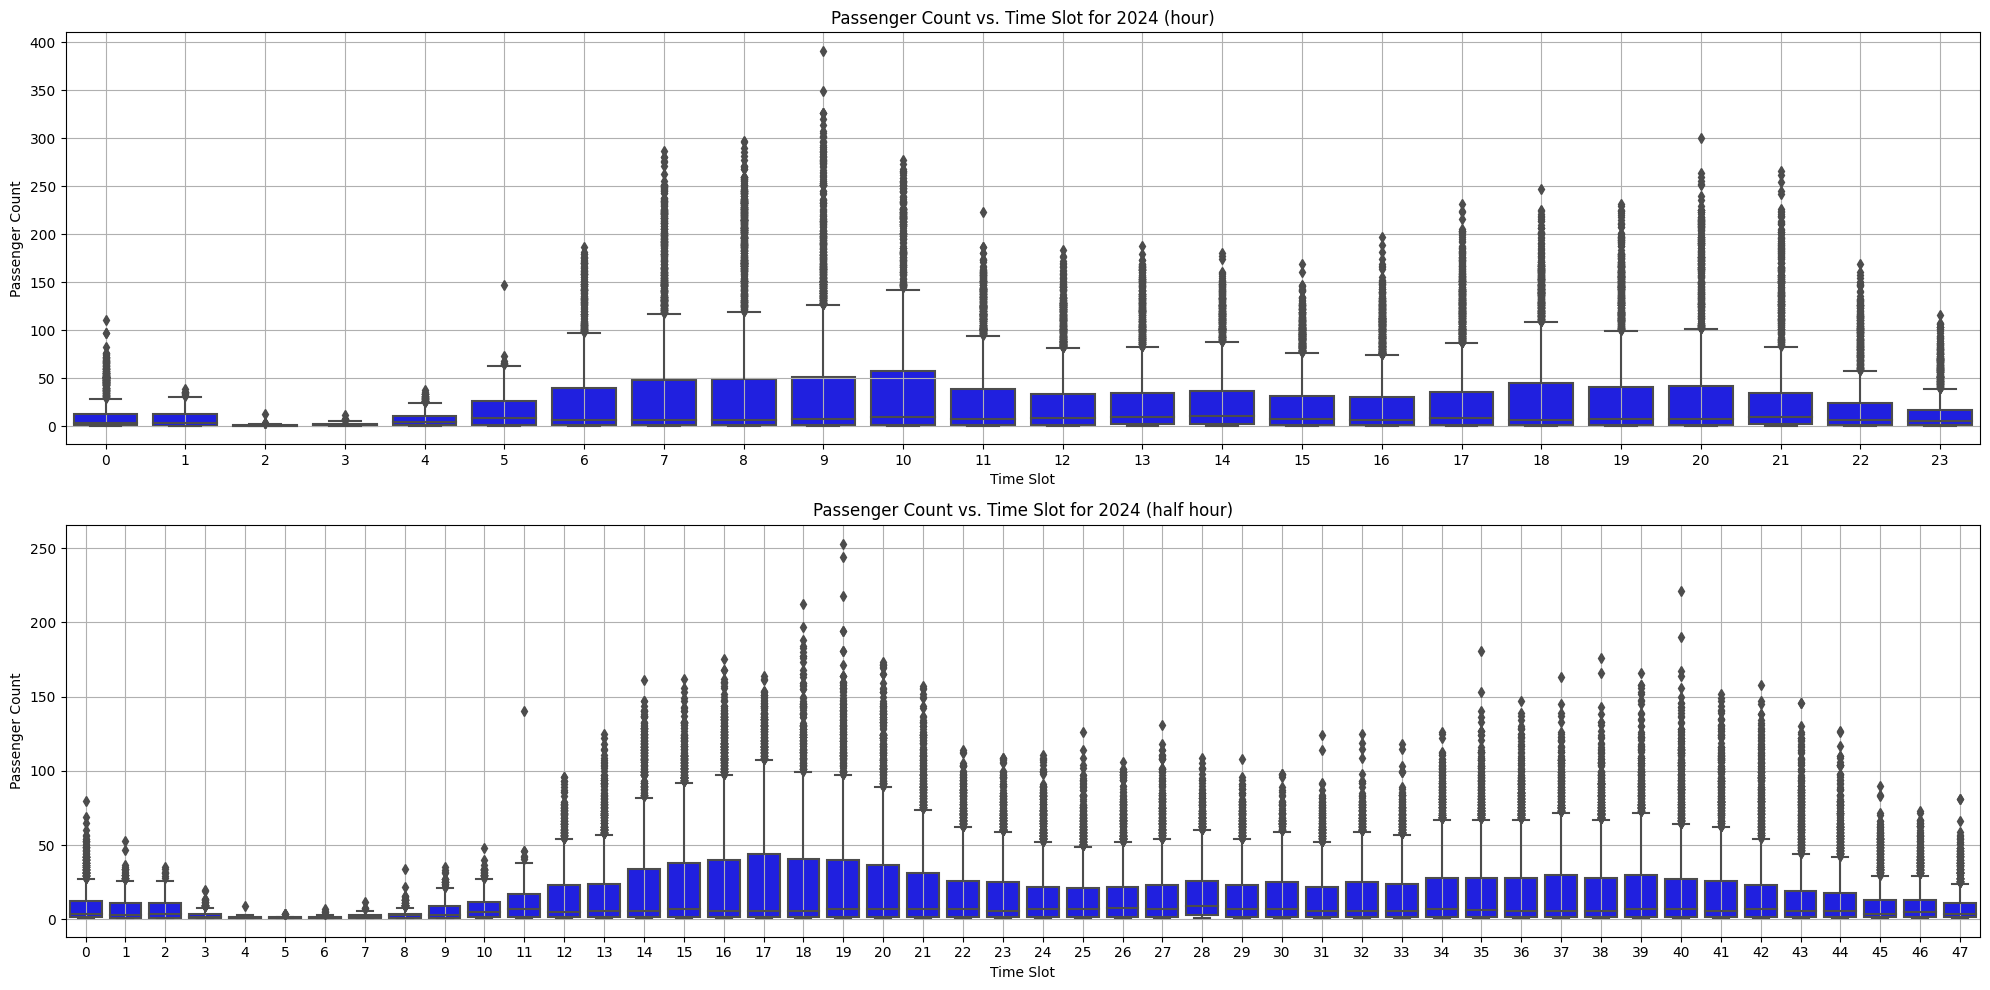

In [66]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))

sns.boxplot(x=hour2024['Time_Slot'], y=hour2024['Passenger_Count'], color='b', ax=ax1)
ax1.set_xlabel('Time Slot')
ax1.set_ylabel('Passenger Count')
ax1.set_title('Passenger Count vs. Time Slot for 2024 (hour)')
ax1.grid(True)

sns.boxplot(x=halfhour2024['Time_Slot'], y=halfhour2024['Passenger_Count'], color='b', ax=ax2)
ax2.set_xlabel('Time Slot')
ax2.set_ylabel('Passenger Count')
ax2.set_title('Passenger Count vs. Time Slot for 2024 (half hour)')
ax2.grid(True)

plt.tight_layout()
plt.show()

## Autocorrelation plots

In [102]:
import statsmodels.api as sm

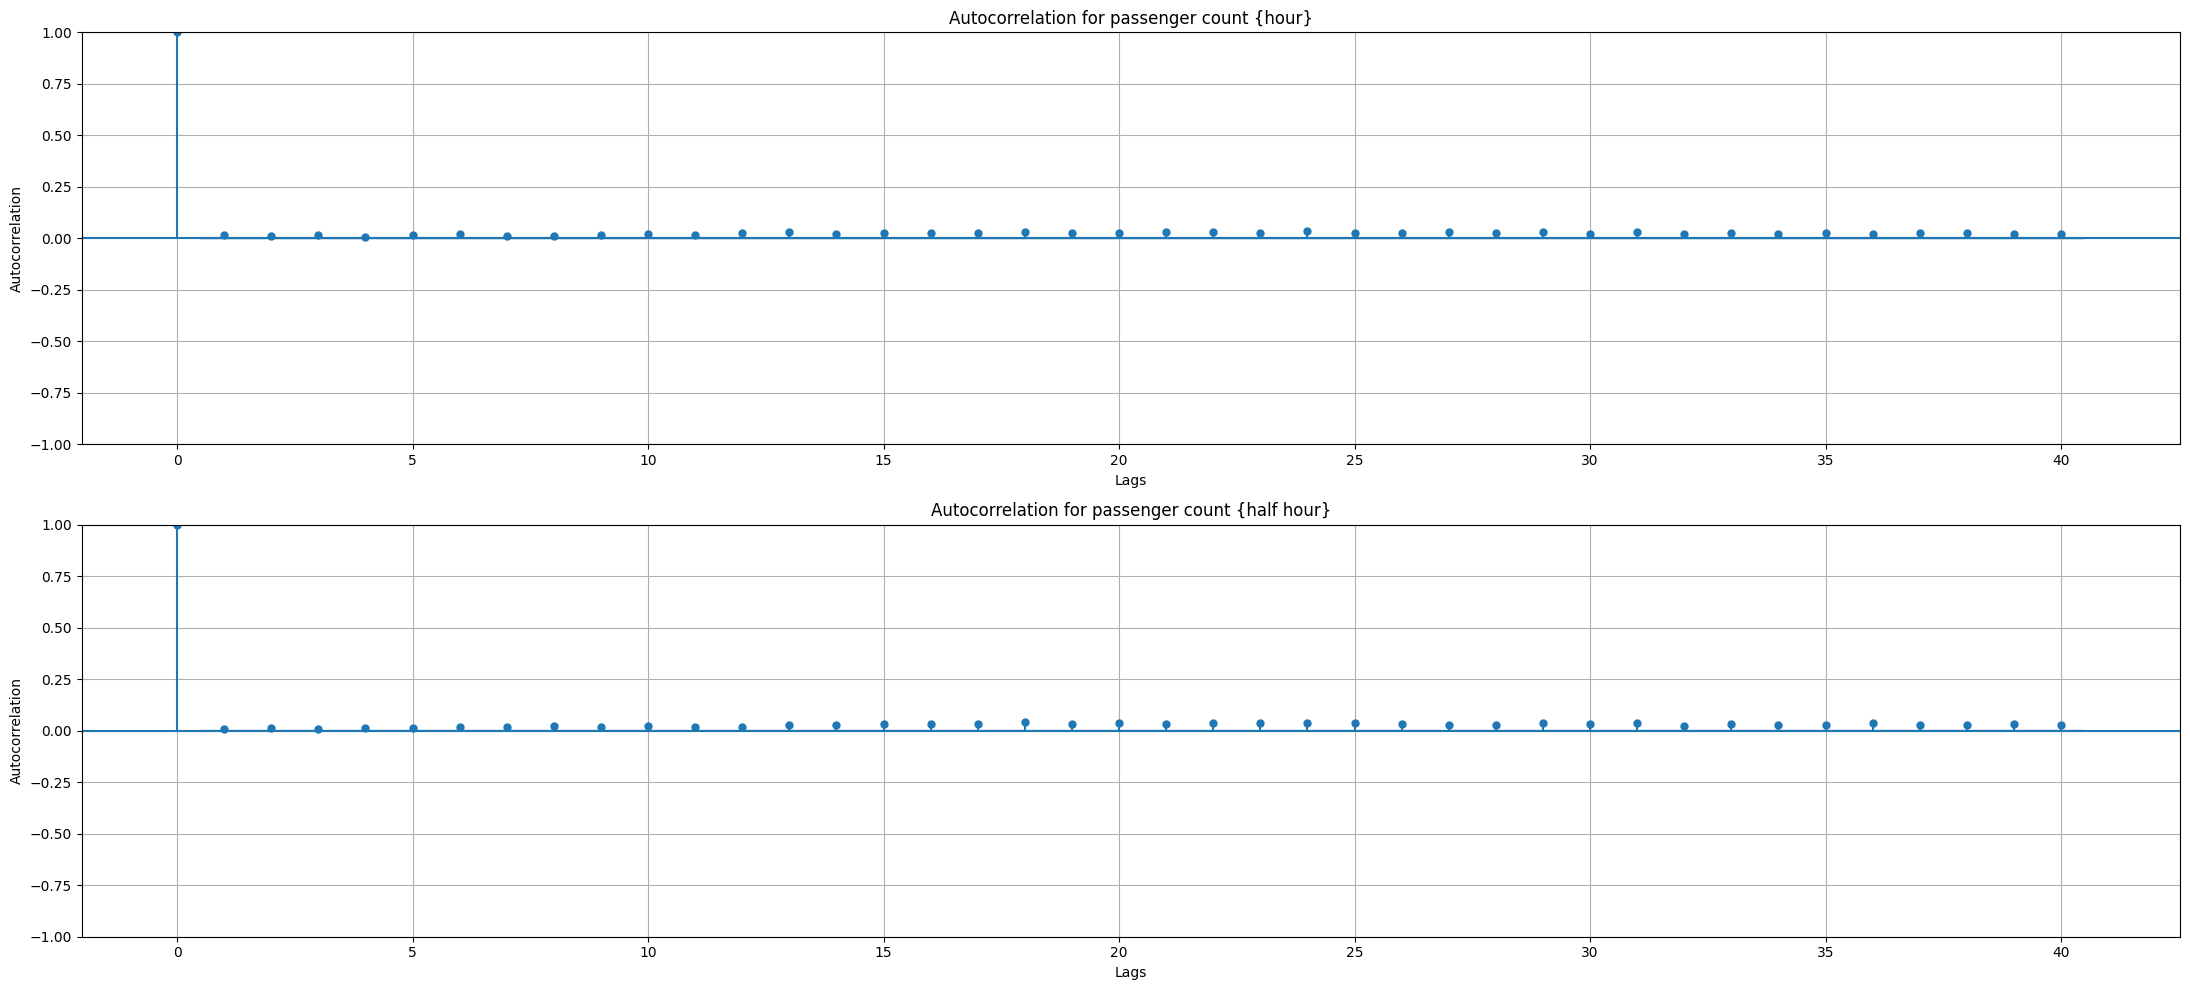

In [110]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(22,10))

sm.graphics.tsa.plot_acf(hour2018['Passenger_Count'], lags=40, ax=ax1)
ax1.set_title('Autocorrelation for passenger count {hour}')
ax1.set_xlabel('Lags')
ax1.set_ylabel('Autocorrelation')
ax1.grid(True)

sm.graphics.tsa.plot_acf(halfhour2018['Passenger_Count'], lags=40, ax=ax2)
ax2.set_title('Autocorrelation for passenger count {half hour}')
ax2.set_xlabel('Lags')
ax2.set_ylabel('Autocorrelation')
ax2.grid(True)

plt.tight_layout()
plt.show()

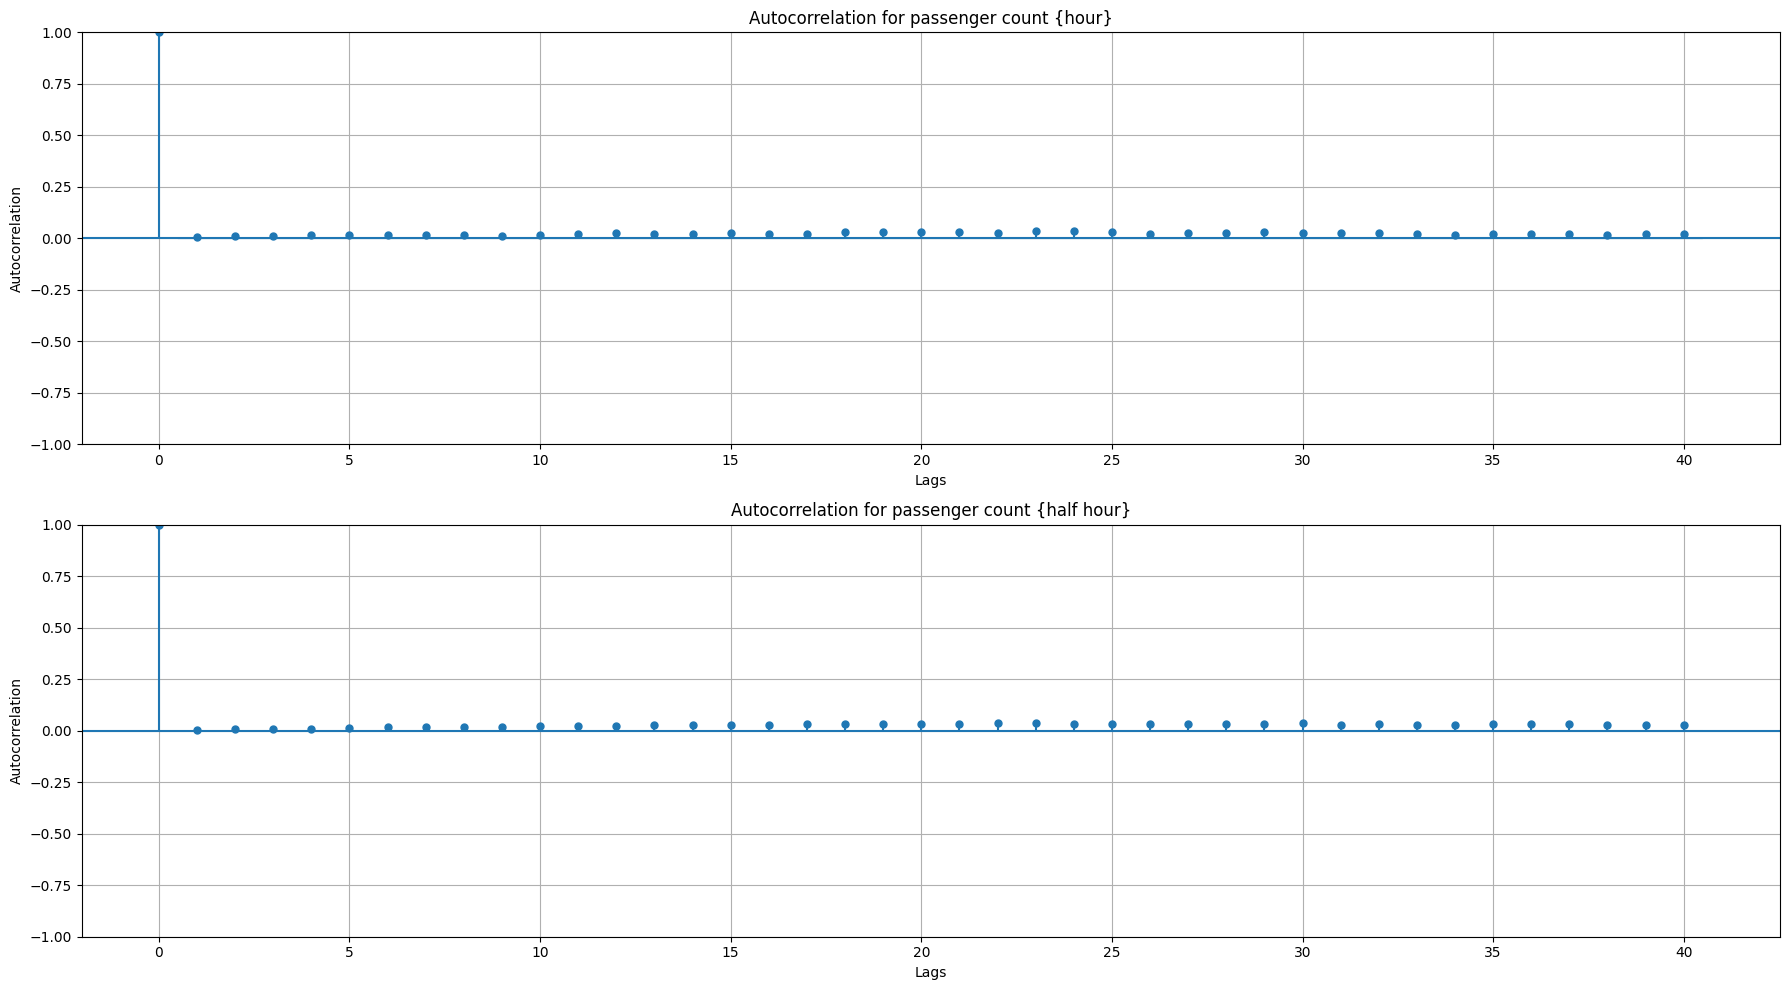

In [107]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(18,10))

sm.graphics.tsa.plot_acf(hour2019['Passenger_Count'], lags=40, ax=ax1)
ax1.set_title('Autocorrelation for passenger count {hour}')
ax1.set_xlabel('Lags')
ax1.set_ylabel('Autocorrelation')
ax1.grid(True)

sm.graphics.tsa.plot_acf(halfhour2019['Passenger_Count'], lags=40, ax=ax2)
ax2.set_title('Autocorrelation for passenger count {half hour}')
ax2.set_xlabel('Lags')
ax2.set_ylabel('Autocorrelation')
ax2.grid(True)

plt.tight_layout()
plt.show()

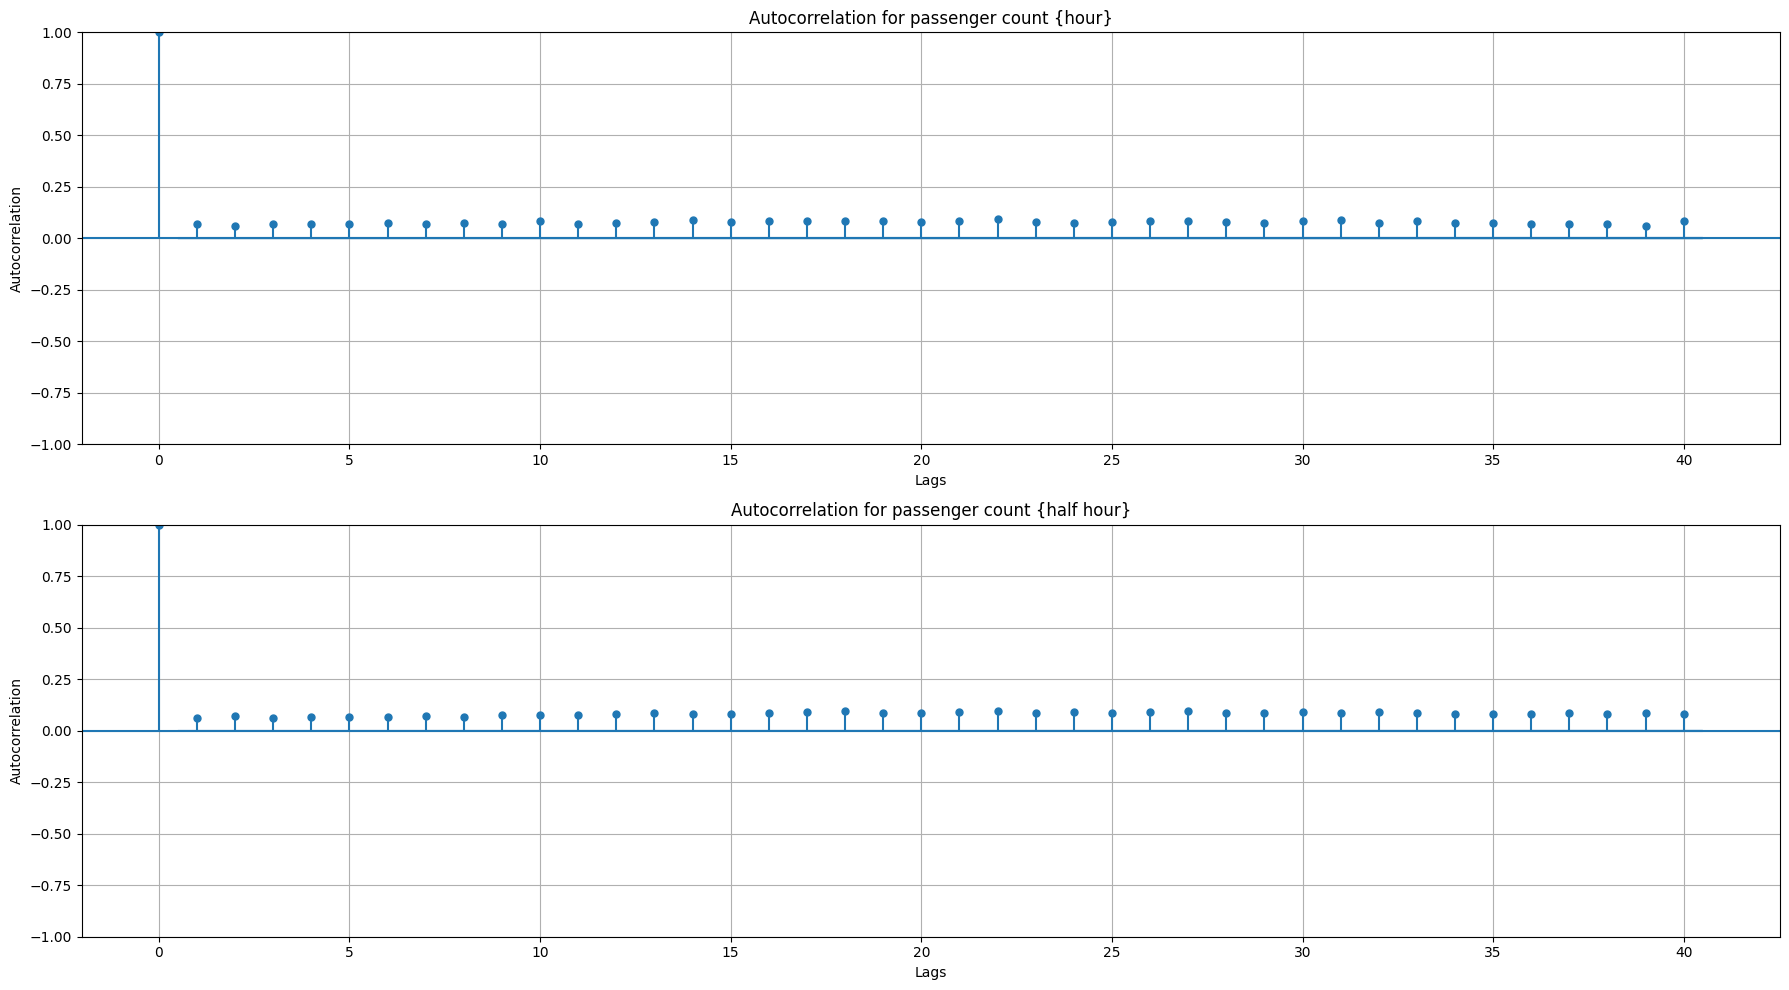

In [108]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(18,10))

sm.graphics.tsa.plot_acf(hour2020['Passenger_Count'], lags=40, ax=ax1)
ax1.set_title('Autocorrelation for passenger count {hour}')
ax1.set_xlabel('Lags')
ax1.set_ylabel('Autocorrelation')
ax1.grid(True)

sm.graphics.tsa.plot_acf(halfhour2020['Passenger_Count'], lags=40, ax=ax2)
ax2.set_title('Autocorrelation for passenger count {half hour}')
ax2.set_xlabel('Lags')
ax2.set_ylabel('Autocorrelation')
ax2.grid(True)

plt.tight_layout()
plt.show()

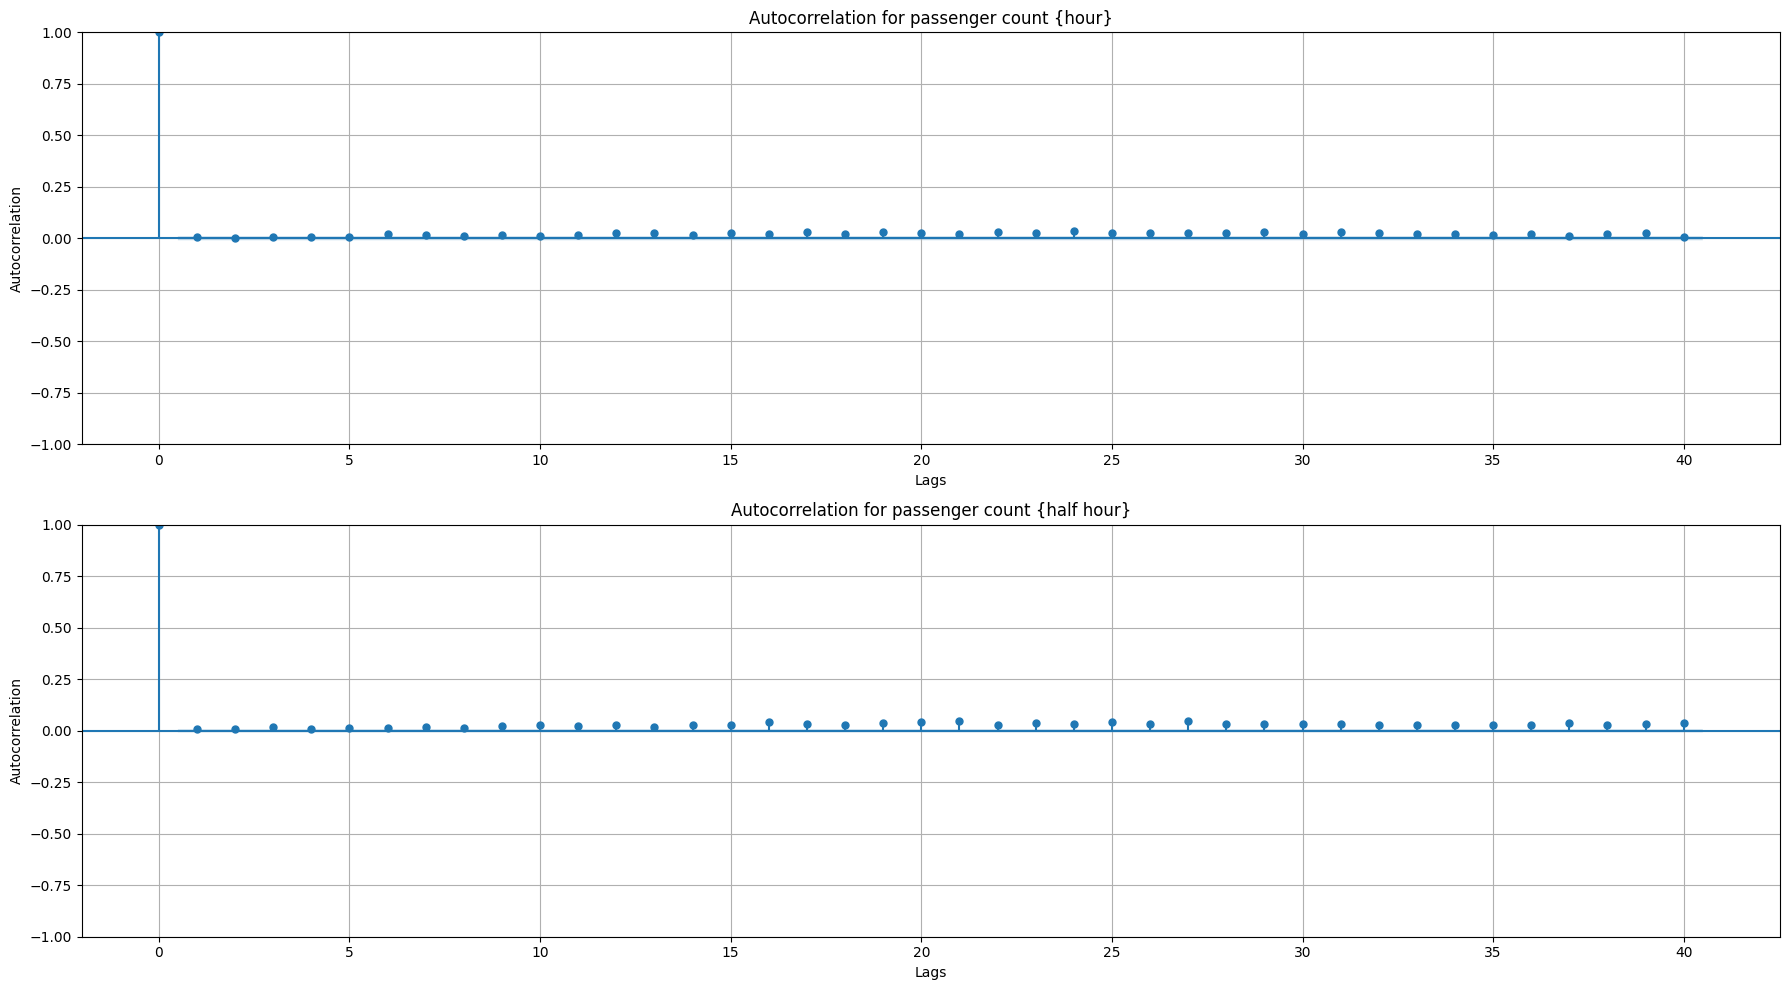

In [109]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(18,10))

sm.graphics.tsa.plot_acf(hour2024['Passenger_Count'], lags=40, ax=ax1)
ax1.set_title('Autocorrelation for passenger count {hour}')
ax1.set_xlabel('Lags')
ax1.set_ylabel('Autocorrelation')
ax1.grid(True)

sm.graphics.tsa.plot_acf(halfhour2024['Passenger_Count'], lags=40, ax=ax2)
ax2.set_title('Autocorrelation for passenger count {half hour}')
ax2.set_xlabel('Lags')
ax2.set_ylabel('Autocorrelation')
ax2.grid(True)

plt.tight_layout()
plt.show()

# Seasonal Decomposition

In [17]:
half_hour.head()

,Date_Time,Passenger_Count,Hour,Minute,Time_Slot
1970-01-01 00:00:00.000000000,2018-07-10 09:30:00,1,9,30,19
1970-01-01 00:00:00.000000001,2018-07-03 11:30:00,1,11,30,23
1970-01-01 00:00:00.000000002,2018-07-17 15:30:00,1,15,30,31
1970-01-01 00:00:00.000000003,2018-07-27 11:00:00,1,11,0,22
1970-01-01 00:00:00.000000004,2018-08-06 13:30:00,1,13,30,27


In [18]:
hour.head()

,Date_Time,Passenger_Count,Date,Time,Hour,Time_Slot
1970-01-01 00:00:00.000000000,2018-07-10 09:00:00,1,2018-07-10,09:00:00,9,9
1970-01-01 00:00:00.000000001,2018-07-03 11:00:00,1,2018-07-03,11:00:00,11,11
1970-01-01 00:00:00.000000002,2018-07-17 15:00:00,1,2018-07-17,15:00:00,15,15
1970-01-01 00:00:00.000000003,2018-07-27 11:00:00,1,2018-07-27,11:00:00,11,11
1970-01-01 00:00:00.000000004,2018-08-06 13:00:00,1,2018-08-06,13:00:00,13,13


# Trend, Seasonality, and Residuals of Passenger Count

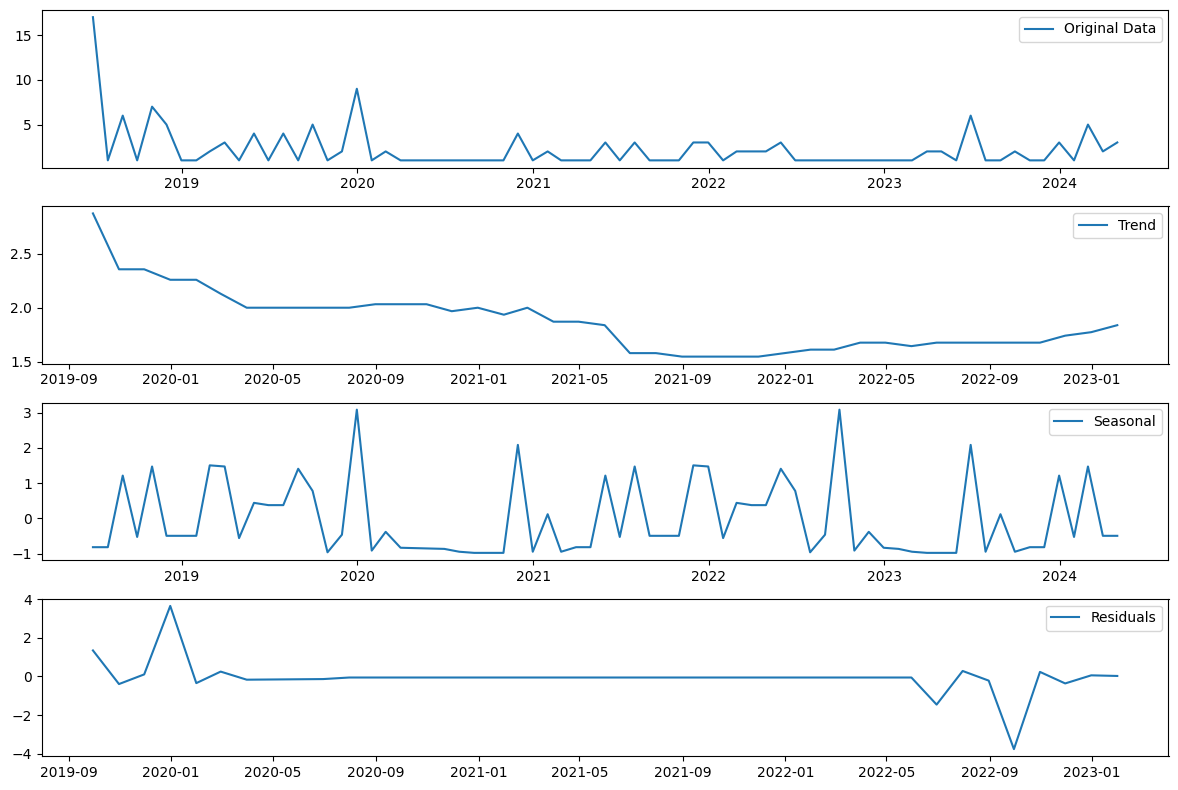

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Convert the 'Date_Time' column to a datetime format
half_hour['Date_Time'] = pd.to_datetime(half_hour['Date_Time'])

# Separate the 'Date_Time' column into 'date' and 'time' columns
half_hour['date'] = half_hour['Date_Time'].dt.date

# Set the 'date' column as the index of the dataframe
half_hour.set_index('date', inplace=True)

# Convert the index to a datetime format
half_hour.index = pd.to_datetime(half_hour.index)

# Filter the dataframe to include only the first day of each month
first_days = half_hour.groupby(pd.Grouper(freq='M')).first()

# Drop rows with missing values
first_days.dropna(inplace=True)

# Perform seasonal decomposition
result = seasonal_decompose(first_days['Passenger_Count'], model='additive', period=31)

# Plot the decomposition
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(first_days.index, first_days['Passenger_Count'], label='Original Data')
plt.legend()

plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(result.resid, label='Residuals')
plt.legend()

plt.tight_layout()
plt.show()

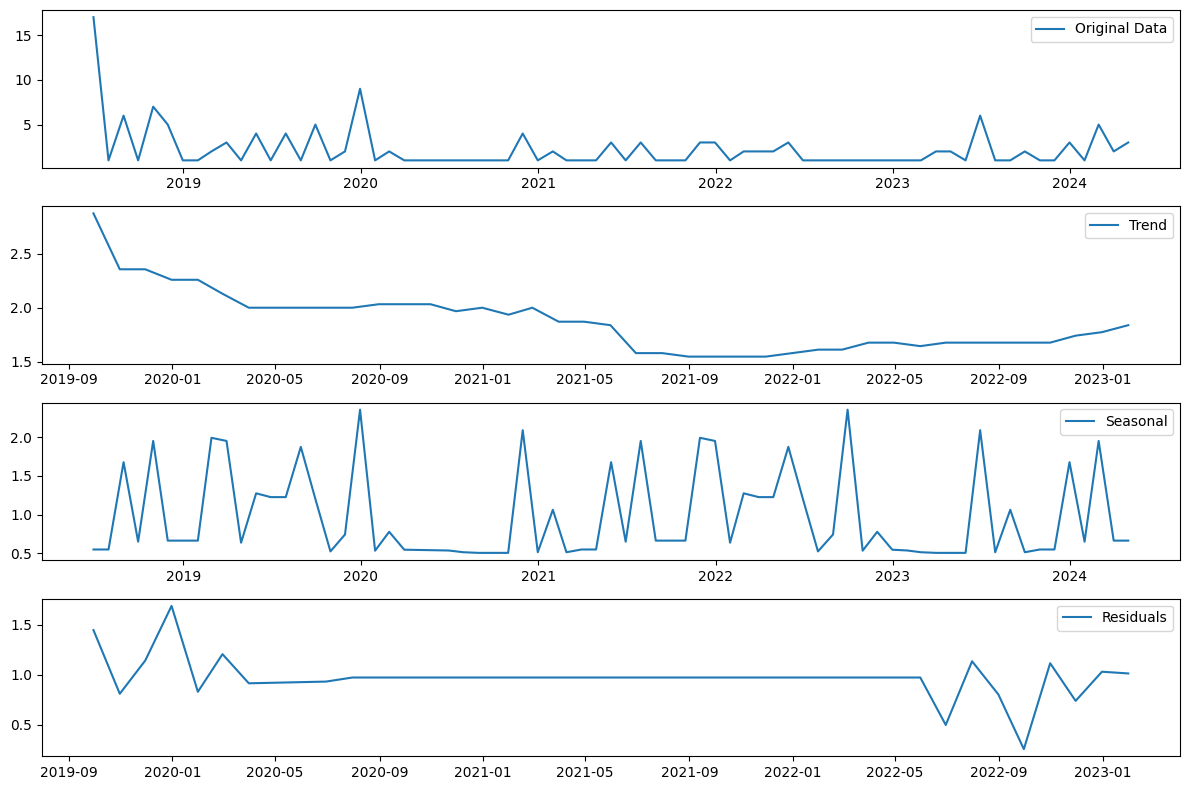

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Convert the 'Date_Time' column to a datetime format
half_hour['Date_Time'] = pd.to_datetime(half_hour['Date_Time'])

# Separate the 'Date_Time' column into 'date' and 'time' columns
half_hour['date'] = half_hour['Date_Time'].dt.date

# Set the 'date' column as the index of the dataframe
half_hour.set_index('date', inplace=True)

# Convert the index to a datetime format
half_hour.index = pd.to_datetime(half_hour.index)

# Filter the dataframe to include only the first day of each month
first_days = half_hour.groupby(pd.Grouper(freq='M')).first()

# Drop rows with missing values
first_days.dropna(inplace=True)

# Perform seasonal decomposition
result = seasonal_decompose(first_days['Passenger_Count'], model='multiplicative', period=31)

# Plot the decomposition
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(first_days.index, first_days['Passenger_Count'], label='Original Data')
plt.legend()

plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(result.resid, label='Residuals')
plt.legend()

plt.tight_layout()
plt.show()

NameError: name 'ax3' is not defined

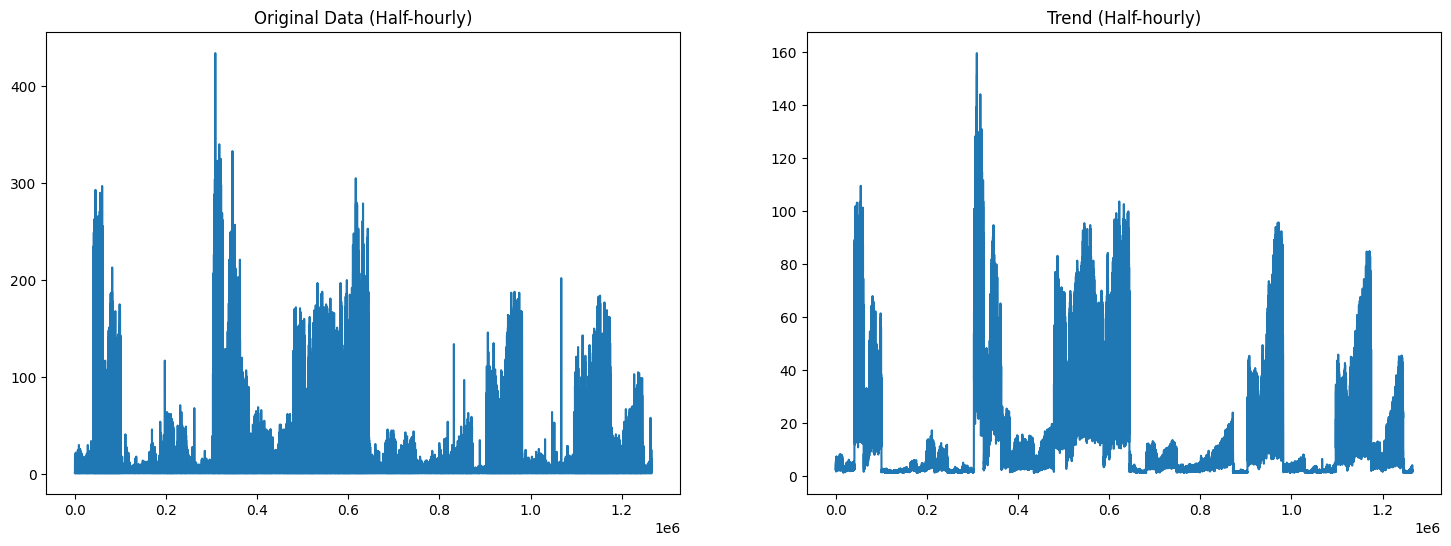

In [30]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

decomposition_half_hour = seasonal_decompose(df1["Passenger_Count"], model='multiplicative', period=48)  # Adjust period to 48 for half-hourly data

decomposition_hour = seasonal_decompose(df2["Passenger_Count"], model='additive', period=24)  # Adjust period to 24 for hourly data

# Create a figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))  # Increase the width of the figure

# Plot components on separate subplots for half-hourly data on the left
ax1.plot(decomposition_half_hour.observed)
ax1.set_title('Original Data (Half-hourly)')
ax2.plot(decomposition_half_hour.trend)
ax2.set_title('Trend (Half-hourly)')
ax3.plot(decomposition_half_hour.seasonal)
ax3.set_title('Seasonal (Half-hourly)')
ax4.plot(decomposition_half_hour.resid)
ax4.set_title('Residuals (Half-hourly)')

# Plot components on separate subplots for hourly data on the right
ax1.plot(decomposition_hour.observed)
ax1.set_title('Original Data (Hourly)')
ax2.plot(decomposition_hour.trend)
ax2.set_title('Trend (Hourly)')
ax3.plot(decomposition_hour.seasonal)
ax3.set_title('Seasonal (Hourly)')
ax4.plot(decomposition_hour.resid)
ax4.set_title('Residuals (Hourly)')

# Adjust layout
plt.tight_layout()

plt.show()

In [ ]:
import warnings
import copy
from pylab import rcParams

In [ ]:
%matplotlib inline
rcParams['figure.figsize']=15,10
warnings.filterwarnings('ignore')

In [ ]:
!pip install pandas

In [ ]:
half_hour.columns.to_list()

In [ ]:
pip install --upgrade statsmodels


In [ ]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Decomposition 1 - Multiplicative Model
decomposition1 = seasonal_decompose(df1["Passenger_Count"], model='multiplicative', period=24)

# Create a figure and subplots for the first decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 6))

# Plot components on separate subplots for the first decomposition
ax1.plot(decomposition1.observed)
ax1.set_title('Original Data (Multiplicative)')
ax2.plot(decomposition1.trend)
ax2.set_title('Trend (Multiplicative)')
ax3.plot(decomposition1.seasonal)
ax3.set_title('Seasonal (Multiplicative)')
ax4.plot(decomposition1.resid)
ax4.set_title('Residuals (Multiplicative)')
plt.tight_layout()


# Decomposition 2 - Additive Model
decomposition2 = seasonal_decompose(df2["Passenger_Count"], model='additive', period=365)

# Create a figure and subplots for the second decomposition
fig2, (ax5, ax6, ax7, ax8) = plt.subplots(4, 1, figsize=(12, 6))

# Plot components on separate subplots for the second decomposition
ax5.plot(decomposition2.observed)
ax5.set_title('Original Data (Additive)')
ax6.plot(decomposition2.trend)
ax6.set_title('Trend (Additive)')
ax7.plot(decomposition2.seasonal)
ax7.set_title('Seasonal (Additive)')
ax8.plot(decomposition2.resid)
ax8.set_title('Residuals (Additive)')
plt.tight_layout()

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
df1.head()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Generate synthetic seasonality data
seasonality = np.sin(np.arange(len(df1)) * 2 * np.pi / 48)  # Assuming a period of 48 for seasonality

# Add seasonality to Passenger_Count using .loc method
df1.loc[:, 'Passenger_Count_with_seasonality'] = df1['Passenger_Count'] + seasonality

# Perform seasonal decomposition
dta = df1.set_index(date_col)['Passenger_Count_with_seasonality']
dta.interpolate(inplace=True)
res = sm.tsa.seasonal_decompose(dta, period=48)

def plotseasonal(res, axes):
    res.observed.plot(ax=axes[0], legend=False)
    axes[0].set_ylabel('Observed')
    res.trend.plot(ax=axes[1], legend=False)
    axes[1].set_ylabel('Trend')
    res.seasonal.plot(ax=axes[2], legend=False)
    axes[2].set_ylabel('Seasonal')
    res.resid.plot(ax=axes[3], legend=False)
    axes[3].set_ylabel('Residual')

fig, axes = plt.subplots(ncols=3, nrows=4, sharex=True, figsize=(12, 5))

plotseasonal(res, axes[:, 0])
plotseasonal(res, axes[:, 1])
plotseasonal(res, axes[:, 2])

plt.tight_layout()
plt.show()

In [ ]:
# Filter the data for the year 2018
df_2018 = df1[df1['Date_Time'].dt.year == 2018]

# Perform seasonal decomposition
dta_2018 = df_2018.set_index('Date_Time')['Passenger_Count']
dta_2018.interpolate(inplace=True)
res_2018 = seasonal_decompose(dta_2018, period=48)

plt.figure(figsize=(12, 3))
plt.plot(res_2018.observed, label='Observed')
plt.plot(res_2018.trend, label='Trend')
plt.plot(res_2018.seasonal, label='Seasonal')
plt.plot(res_2018.resid, label='Residual')
plt.legend()
plt.show()

In [ ]:
date_col = 'Date_Time'
df1[date_col] = pd.to_datetime(df1[date_col], format='mixed')

# Filter data for year 2018
df_2019 = df1.loc[df1[date_col].dt.year == 2019]

# Extract passenger count data (assuming 'Passenger_Count' column)
ts = df_2018['Passenger_Count']

# Perform seasonal decomposition
dta_2019 = df_2019.set_index('Date_Time')['Passenger_Count']
dta_2019.interpolate(inplace=True)
res_2019 = sm.tsa.seasonal_decompose(dta_2019, period=7)

def plotseasonal(res, axes):
    res.observed.plot(ax=axes[0], legend=False)
    axes[0].set_ylabel('Observed')
    res.trend.plot(ax=axes[1], legend=False)
    axes[1].set_ylabel('Trend')
    res.seasonal.plot(ax=axes[2], legend=False)
    axes[2].set_ylabel('Seasonal')
    res.resid.plot(ax=axes[3], legend=False)
    axes[3].set_ylabel('Residual')

fig, axes = plt.subplots(ncols=3, nrows=4, sharex=True, figsize=(12, 5))

plotseasonal(res_2019, axes[:, 0])
plotseasonal(res_2019, axes[:, 1])
plotseasonal(res_2019, axes[:, 2])

plt.tight_layout()
plt.show()

In [ ]:
# Filter the data for the year 2018
df_2019 = df1[df1['Date_Time'].dt.year == 2019]

# Perform seasonal decomposition
dta_2018 = df_2019.set_index('Date_Time')['Passenger_Count']
dta_2018.interpolate(inplace=True)
res_2018 = seasonal_decompose(dta_2018, period=7)

plt.figure(figsize=(12, 3))
plt.plot(res_2019.observed, label='Observed')
plt.plot(res_2019.trend, label='Trend')
plt.plot(res_2019.seasonal, label='Seasonal')
plt.plot(res_2019.resid, label='Residual')
plt.legend()
plt.show()

In [ ]:
result_add = seasonal_decompose(ts, model='additive', period=7)

In [ ]:
plt.figure(figsize=(9, 3))

plt.plot(result_add.trend, label='Additive Trend')
plt.legend()


In [ ]:
plt.figure(figsize=(9, 3))

plt.plot(result_add.seasonal, label='Additive Seasonal')
plt.legend()


## Calculate the Simple Moving Average (SMA)

In [ ]:
sma_window = 7 # 7-day moving average
sma = ts.rolling(window=sma_window).mean()
sma


##  Calculate Exponential Moving Average (EMA)

In [ ]:
ema_window = 30 # 30-day moving average
ema = ts.ewm(span=ema_window, adjust=False).mean()
ema


In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(ts, label='Original Time Series')
plt.plot(sma, label=f'{sma_window}-Day SMA')
plt.plot(ema, label=f'{ema_window}-Day EMA')
plt.legend()


In [ ]:
np.random.seed(0)
date_rng = pd.date_range(start="2018-01-01", periods=365, freq="D")
data = np.sin(np.arange(365) * 2 * np.pi / 365) + np.random.normal(0, 0.5, 365)
ts = pd.Series(data, index=date_rng)
ts

In [ ]:
plt.figure(figsize=(12, 3))
plt.plot(ts, label='Original Time Series')
plt.legend()